# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
from scipy.stats import ttest_ind
from scipy.stats import levene
from datetime import datetime

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
users = pd.read_csv('C:/Users/aldo_/OneDrive/Documentos/My Learning/Bootcamp/DataSets/Sprint_4/megaline_users.csv')
calls = pd.read_csv('C:/Users/aldo_/OneDrive/Documentos/My Learning/Bootcamp/DataSets/Sprint_4/megaline_calls.csv')
messages = pd.read_csv('C:/Users/aldo_/OneDrive/Documentos/My Learning/Bootcamp/DataSets/Sprint_4/megaline_messages.csv')
internet = pd.read_csv('C:/Users/aldo_/OneDrive/Documentos/My Learning/Bootcamp/DataSets/Sprint_4/megaline_internet.csv')
plans = pd.read_csv('C:/Users/aldo_/OneDrive/Documentos/My Learning/Bootcamp/DataSets/Sprint_4/megaline_plans.csv')


**Comentario:** Antes de ejecutar la celda anterior, se visualizó en un archivo .txt el fomato en el que venían cada uno de los archivos y todos están separados por comas.

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Respuesta:** Notamos que es una tabla donde se almacena la información necesaria para cada plan. En el contenido se identificó dos columnas que almacenan un tipo de dato equivocado, pues las columnas [usd_monthly_pay] y [usd_per_gb] al ser un valor monetario, tendrían que representarse como 
`float` en lugar de `int`. También, una observación importante es que a cada plan le hace falta un identificador único, sin embargo, hasta este punto no se ve necesario. Fuera de eso, no se observó ningun otro tipo de dato erróneo, ausente o duplicado.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
# Cambiando las columnas [usd_monthly_pay] y [usd_per_gb] a flotante.
plans['usd_monthly_pay'] = plans['usd_monthly_pay'].astype('float')
plans['usd_per_gb'] = plans['usd_per_gb'].astype('float')
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(4), int64(3), object(1)
memory usage: 260.0+ bytes


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
# Agregando un identificador único a cada plan.

# Crear la columna de ID (empezando desde 1)
plans['plan_id'] = range(1, len(plans) + 1)

# Insertar la columna 'id' al inicio del DataFrame
plans.insert(0, 'plan_id', plans.pop('plan_id'))

print(plans)


   plan_id  messages_included  mb_per_month_included  minutes_included  \
0        1                 50                  15360               500   
1        2               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0             20.0        10.0             0.03            0.03      surf  
1             70.0         7.0             0.01            0.01  ultimate  


## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios

print(users.sample(5))

     user_id first_name  last_name  age  \
286     1286      Casie  Castaneda   52   
206     1206    Angelic  Singleton   21   
471     1471     Britni   Mitchell   59   
2       1002     Carlee    Hoffman   36   
306     1306     Darron      Craig   19   

                                                 city    reg_date  plan  \
286                         New Haven-Milford, CT MSA  2018-12-07  surf   
206                     Providence-Warwick, RI-MA MSA  2018-07-09  surf   
471                                  Richmond, VA MSA  2018-10-13  surf   
2                Las Vegas-Henderson-Paradise, NV MSA  2018-10-21  surf   
306  Washington-Arlington-Alexandria, DC-VA-MD-WV MSA  2018-11-26  surf   

    churn_date  
286        NaN  
206        NaN  
471        NaN  
2          NaN  
306        NaN  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Respuesta:** Notamos que esta tabla almacena informción básica de los usuarios que contratan o contrataron un servicio de los que se ofrecen. Se identificó que el tipo de dato para la columna 'reg_date' es `object` cuando esperaríamos que fuera `Timestamp`. Fuera de eso, no se observaron tipos de datos erróneos o ausentes que se necesiten investigar. Pues la única columna donde se identificaron valores ausentes, por naturaleza pueden existir dichas ausencias. Lo único que nos resta, es revisar que no existan registros duplicados.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
# Convertiremos la columna reg_date a tipo datetime.

users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
print(users)

     user_id first_name   last_name  age  \
0       1000   Anamaria       Bauer   45   
1       1001     Mickey   Wilkerson   28   
2       1002     Carlee     Hoffman   36   
3       1003   Reynaldo     Jenkins   52   
4       1004    Leonila    Thompson   40   
..       ...        ...         ...  ...   
495     1495      Fidel      Sharpe   67   
496     1496      Ariel    Shepherd   49   
497     1497      Donte     Barrera   49   
498     1498       Scot  Williamson   51   
499     1499      Shena     Dickson   37   

                                          city   reg_date      plan churn_date  
0        Atlanta-Sandy Springs-Roswell, GA MSA 2018-12-24  ultimate        NaN  
1              Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf        NaN  
2         Las Vegas-Henderson-Paradise, NV MSA 2018-10-21      surf        NaN  
3                                Tulsa, OK MSA 2018-01-28      surf        NaN  
4              Seattle-Tacoma-Bellevue, WA MSA 2018-05-23      sur

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
# Verificando que el tipo de dato 'object' haya cambiado a 'datetime'

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Imprime una muestra de datos para las llamadas

print(calls.sample(5))

              id  user_id   call_date  duration
88832   1324_892     1324  2018-06-09     16.02
87241   1320_910     1320  2018-08-24      0.00
123719  1436_599     1436  2018-11-18      1.80
64959   1236_235     1236  2018-11-04      2.58
84307    1310_34     1310  2018-11-30     14.87


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Respuesta:** Vemos una tabla que contiene información suficiente para ver el historial de llamadas que se han realizado por los distintos usuarios que consumen este servicio. De acuerdo con las especificaciones *" Para llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto."* notamos que la columna de 'duartion' contiene el tiempo sin redondear, así que se corregira esa parte redondeando hacia arriba cada llamada. También, se identificó que el tipo de dato para la columna 'call_date' es `object` cuando esperaríamos que fuera `Timestamp`.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
# Convertiremos la columna reg_date a tipo datetime.

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
print(calls)

              id  user_id  call_date  duration
0        1000_93     1000 2018-12-27      8.52
1       1000_145     1000 2018-12-27     13.66
2       1000_247     1000 2018-12-27     14.48
3       1000_309     1000 2018-12-28      5.76
4       1000_380     1000 2018-12-30      4.22
...          ...      ...        ...       ...
137730  1499_199     1499 2018-11-21      8.72
137731  1499_200     1499 2018-10-20     10.89
137732  1499_201     1499 2018-09-21      8.12
137733  1499_202     1499 2018-10-10      0.37
137734  1499_203     1499 2018-12-29     13.86

[137735 rows x 4 columns]


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [14]:
# Redondeando hacia arriba los valores de la columna 'duration'.

calls['duration'] = np.ceil(calls['duration'])

print(calls.sample(5))

              id  user_id  call_date  duration
126647   1451_47     1451 2018-09-05      16.0
36321   1138_275     1138 2018-05-11       6.0
95135    1337_61     1337 2018-11-22      15.0
61987   1223_149     1223 2018-10-09       5.0
53215   1191_363     1191 2018-08-16       0.0


In [15]:
# Verificando que se hayan realizado los cambios
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


## Mensajes

In [16]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
# Imprime una muestra de datos para los mensajes

print(messages.sample(5))

             id  user_id message_date
46787   1320_31     1320   2018-12-11
22853  1137_162     1137   2018-12-24
22524  1133_747     1133   2018-09-05
58149   1366_25     1366   2018-12-12
16931  1112_161     1112   2018-11-06


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Respuesta:** Tenemos una tabla que almacena la información básica sobre el consumo de mensajería. Se identificó que el tipo de dato para la columna 'message_date' es `object` cuando esperaríamos que fuera `Timestamp`. Fuera de eso, no notamos datos ausentes, erróneos o duplicados.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [18]:
# Convertiremos la columna reg_date a tipo datetime.

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
print(messages)

             id  user_id message_date
0      1000_125     1000   2018-12-27
1      1000_160     1000   2018-12-31
2      1000_223     1000   2018-12-31
3      1000_251     1000   2018-12-27
4      1000_255     1000   2018-12-26
...         ...      ...          ...
76046  1497_526     1497   2018-12-24
76047  1497_536     1497   2018-12-24
76048  1497_547     1497   2018-12-31
76049  1497_558     1497   2018-12-24
76050  1497_613     1497   2018-12-23

[76051 rows x 3 columns]


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [19]:
# Verificando que el tipo de dato 'object' haya cambiado a 'datetime'
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


## Internet

In [20]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
# Imprime una muestra de datos para el tráfico de internet

print(internet.sample(5))

             id  user_id session_date  mb_used
85491   1399_98     1399   2018-11-15   778.58
24796   1114_76     1114   2018-10-09   775.16
23984  1110_242     1110   2018-09-12    26.54
69689   1325_91     1325   2018-12-26     0.00
20995   1098_12     1098   2018-08-19   580.01


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Respuesta:** Vemos una tabla que guarda los registros y campos necesarios para el consumo de internet de usuarios. Se identificó que el tipo de dato para la columna 'session_date' es `object` cuando esperaríamos que fuera `Timestamp`. Fuera de eso, no notamos datos ausentes, erróneos o duplicados.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [22]:
# Convertiremos la columna reg_date a tipo datetime.

internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
print(internet)

              id  user_id session_date  mb_used
0        1000_13     1000   2018-12-29    89.86
1       1000_204     1000   2018-12-31     0.00
2       1000_379     1000   2018-12-28   660.40
3       1000_413     1000   2018-12-26   270.99
4       1000_442     1000   2018-12-27   880.22
...          ...      ...          ...      ...
104820  1499_215     1499   2018-10-20   218.06
104821  1499_216     1499   2018-12-30   304.72
104822  1499_217     1499   2018-09-22   292.75
104823  1499_218     1499   2018-12-07     0.00
104824  1499_219     1499   2018-12-24   758.31

[104825 rows x 4 columns]


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [23]:
# Verificando que el tipo de dato 'object' haya cambiado a 'datetime'
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [24]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print(plans)

   plan_id  messages_included  mb_per_month_included  minutes_included  \
0        1                 50                  15360               500   
1        2               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0             20.0        10.0             0.03            0.03      surf  
1             70.0         7.0             0.01            0.01  ultimate  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [25]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

# Primero, revisemos si toda la información es de un solo año (2018).
print(calls['call_date'].dt.year.unique())
print()

# Ahora, crearemos una columna que almacene el mes de cada llamada.
calls['month'] = calls['call_date'].dt.month

# Finalmente, determinaremos el número de llamadas hechas por cada usuario al mes.
calls_per_months = calls.groupby(['user_id', 'month'])['call_date'].count().reset_index(name='callsxmonth')

print(calls_per_months)

[2018]

      user_id  month  callsxmonth
0        1000     12           16
1        1001      8           27
2        1001      9           49
3        1001     10           65
4        1001     11           64
...       ...    ...          ...
2253     1498     12           39
2254     1499      9           41
2255     1499     10           53
2256     1499     11           45
2257     1499     12           65

[2258 rows x 3 columns]


In [26]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

min_per_month = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='minxmonth')
print(min_per_month)

      user_id  month  minxmonth
0        1000     12      124.0
1        1001      8      182.0
2        1001      9      315.0
3        1001     10      393.0
4        1001     11      426.0
...       ...    ...        ...
2253     1498     12      339.0
2254     1499      9      346.0
2255     1499     10      385.0
2256     1499     11      308.0
2257     1499     12      496.0

[2258 rows x 3 columns]


In [27]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

# Primero, revisemos si toda la información es de un solo año (2018).
print(messages['message_date'].dt.year.unique())
print()

# Ahora, crearemos una columna que almacene el mes de cada mensaje.
messages['month'] = messages['message_date'].dt.month

# Finalmente, determinaremos el número de mensajes mandados  por cada usuario al mes.
messages_per_months = messages.groupby(['user_id', 'month'])['message_date'].count().reset_index(name='messagesxmonth')

print(messages_per_months)

[2018]

      user_id  month  messagesxmonth
0        1000     12              11
1        1001      8              30
2        1001      9              44
3        1001     10              53
4        1001     11              36
...       ...    ...             ...
1801     1496      9              21
1802     1496     10              18
1803     1496     11              13
1804     1496     12              11
1805     1497     12              50

[1806 rows x 3 columns]


In [28]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

# Primero, revisemos si toda la información es de un solo año (2018).
print(internet['session_date'].dt.year.unique())
print()

# Ahora, crearemos una columna que almacene el mes de cada mensaje.
internet['month'] = internet['session_date'].dt.month

# Finalmente, determinaremos el consumo de mb y gb por cada usuario al mes.
# MegaBytes
gb_per_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='gbxmonth')
# GigaBytes: Se convierte a gigas y se redondea a valores enteros por regla de negocio
gb_per_month['gbxmonth'] = np.ceil((gb_per_month['gbxmonth']/1024).round(2))

print(gb_per_month)

[2018]

      user_id  month  gbxmonth
0        1000     12       2.0
1        1001      8       7.0
2        1001      9      13.0
3        1001     10      22.0
4        1001     11      19.0
...       ...    ...       ...
2272     1498     12      23.0
2273     1499      9      13.0
2274     1499     10      20.0
2275     1499     11      17.0
2276     1499     12      22.0

[2277 rows x 3 columns]


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [29]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

# Crearemos un DataFrame con todos los id de los usuarios para evitar tener 
# inconsistencia en los datos.
all_users = users[['user_id', 'plan']]

# Cambiaremos el nombre de la columna 'plan' por 'plan_name' para poder fusionar 
# las tablas de plans y la creada en esta celda 'consum_user_month'
all_users.columns = ['user_id', 'plan_name']

#Fusionamos todos los DataFrames que creamos anteriormente.
consum_user_month = all_users.merge(calls_per_months, on='user_id', how='left')\
                         .merge(min_per_month, on=['user_id', 'month'], how='left')\
                         .merge(messages_per_months, on=['user_id', 'month'], how='left')\
                         .merge(gb_per_month, on=['user_id', 'month'], how='left')

# Elimenaremos los valores nulos, pues no todos los mismos clientes hicieron 
# llamadas, mensaje so consumieron internet.
consum_user_month['callsxmonth'] = consum_user_month['callsxmonth'].fillna(0)
consum_user_month['minxmonth'] = consum_user_month['minxmonth'].fillna(0)
consum_user_month['messagesxmonth'] = consum_user_month['messagesxmonth'].fillna(0)
consum_user_month['gbxmonth'] = consum_user_month['gbxmonth'].fillna(0)

print(consum_user_month)

      user_id plan_name  month  callsxmonth  minxmonth  messagesxmonth  \
0        1000  ultimate   12.0         16.0      124.0            11.0   
1        1001      surf    8.0         27.0      182.0            30.0   
2        1001      surf    9.0         49.0      315.0            44.0   
3        1001      surf   10.0         65.0      393.0            53.0   
4        1001      surf   11.0         64.0      426.0            36.0   
...       ...       ...    ...          ...        ...             ...   
2272     1498      surf   12.0         39.0      339.0             0.0   
2273     1499      surf    9.0         41.0      346.0             0.0   
2274     1499      surf   10.0         53.0      385.0             0.0   
2275     1499      surf   11.0         45.0      308.0             0.0   
2276     1499      surf   12.0         65.0      496.0             0.0   

      gbxmonth  
0          2.0  
1          7.0  
2         13.0  
3         22.0  
4         19.0  
...      

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

In [30]:
# Añade la información de la tarifa

#Fusionando 'plans' y 'consum_user_month'
plan_consum_user_month = consum_user_month.merge(plans, on='plan_name', how='left')

# Restableciendo el orden de las columnas
column_ord = ['user_id', 'plan_name', 'month', 'callsxmonth', 'minutes_included',
              'minxmonth', 'usd_per_minute', 'messages_included', 'messagesxmonth', 
              'usd_per_message', 'mb_per_month_included', 'gbxmonth', 'usd_per_gb',
              'usd_monthly_pay']
plan_consum_user_month = plan_consum_user_month[column_ord]

# Convertiremos la columna 'mb_per_month_included' a 'gb_per_month_included', es decir, lo expresaremos en gigas.
plan_consum_user_month['mb_per_month_included'] = (plan_consum_user_month['mb_per_month_included']/1024).round(2)
plan_consum_user_month.rename(columns={'mb_per_month_included': 'gb_per_month_included'}, inplace=True)

print(plan_consum_user_month)

      user_id plan_name  month  callsxmonth  minutes_included  minxmonth  \
0        1000  ultimate   12.0         16.0              3000      124.0   
1        1001      surf    8.0         27.0               500      182.0   
2        1001      surf    9.0         49.0               500      315.0   
3        1001      surf   10.0         65.0               500      393.0   
4        1001      surf   11.0         64.0               500      426.0   
...       ...       ...    ...          ...               ...        ...   
2272     1498      surf   12.0         39.0               500      339.0   
2273     1499      surf    9.0         41.0               500      346.0   
2274     1499      surf   10.0         53.0               500      385.0   
2275     1499      surf   11.0         45.0               500      308.0   
2276     1499      surf   12.0         65.0               500      496.0   

      usd_per_minute  messages_included  messagesxmonth  usd_per_message  \
0          

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [31]:
# Calcula el ingreso mensual para cada usuario

# Primero, determinaremos el ingreso mensual restando el límite del paquete 
# gratuito del número total de llamadas, mensajes e internet.
calls_ = (plan_consum_user_month['minxmonth']-plan_consum_user_month['minutes_included']) 
messages_ = (plan_consum_user_month['messagesxmonth']-plan_consum_user_month['messages_included'])
internet_ = (plan_consum_user_month['gbxmonth']-plan_consum_user_month['gb_per_month_included']) 

# Aquí se multiplica el resultado por el valor del plan de llamadas y se añade
# la tarifa mensual en función del plan de llamadas. Para agregarla al DataFrame 'plan_consum_user_month'
plan_consum_user_month['income'] = (((calls_ + messages_ + internet_) * plan_consum_user_month['usd_per_minute']) + plan_consum_user_month['usd_monthly_pay']).round(2)

# Nombramos un nuevo DataFrame 'income_user_month' donde está el ingreso mensual para cada usuario.
income_user_month = plan_consum_user_month[['user_id', 'month', 'income']]

print(income_user_month)

      user_id  month  income
0        1000   12.0   31.07
1        1001    8.0    9.62
2        1001    9.0   14.21
3        1001   10.0   17.09
4        1001   11.0   17.48
...       ...    ...     ...
2272     1498   12.0   13.91
2273     1499    9.0   13.82
2274     1499   10.0   15.20
2275     1499   11.0   12.80
2276     1499   12.0   18.59

[2277 rows x 3 columns]


**Comentario:** Identificar el número de llamadas, minutos por mes, así como mensajes, internet y la unión de estos junto con los precios que incluye cada plan, no me costó trabajo. 

Al determinar el ingreso mensual para cada usuario, no estoy 100% seguro de que esté bien, de acuerdo a lo que se solicita. Me confundió un poco la manera en que está redactado, creo que ayudaría especificar o ejemplificar un poco más el resultado que se espera tener.

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

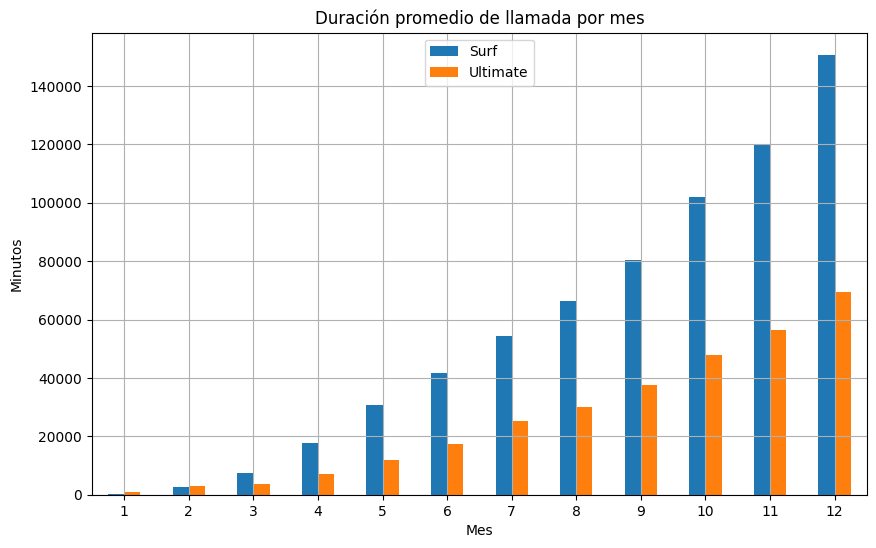

In [32]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Extraemos la duración promedio de llamadas por cada plan y por cada mes.
surf_call_mean = plan_consum_user_month[plan_consum_user_month['plan_name']=='surf'][['month', 'minxmonth']].groupby('month').sum().round(2)
ultimate_call_mean = plan_consum_user_month[plan_consum_user_month['plan_name']=='ultimate'][['month', 'minxmonth']].groupby('month').sum().round(2)

# Fusionamos ambas duraciones de cada plan con los mísmos índices que son los meses.
call_dur = pd.concat([surf_call_mean, ultimate_call_mean], axis='columns')

# Las renombramos para identificarlas más fácil.
call_dur.columns = ['surf_min_mean', 'ultimate_min_mean']

# El índice lo convertimos en entero para que sea más claro el gráfico.
call_dur.index = call_dur.index.astype(int)

# Graficamos los datos.
call_dur.plot(kind = 'bar', 
              title = 'Duración promedio de llamada por mes', 
              xlabel = 'Mes', 
              ylabel = 'Minutos', 
              rot=360, 
              figsize=(10, 6))
plt.grid()
plt.legend(['Surf', 'Ultimate'], loc = 'upper center')
plt.show()

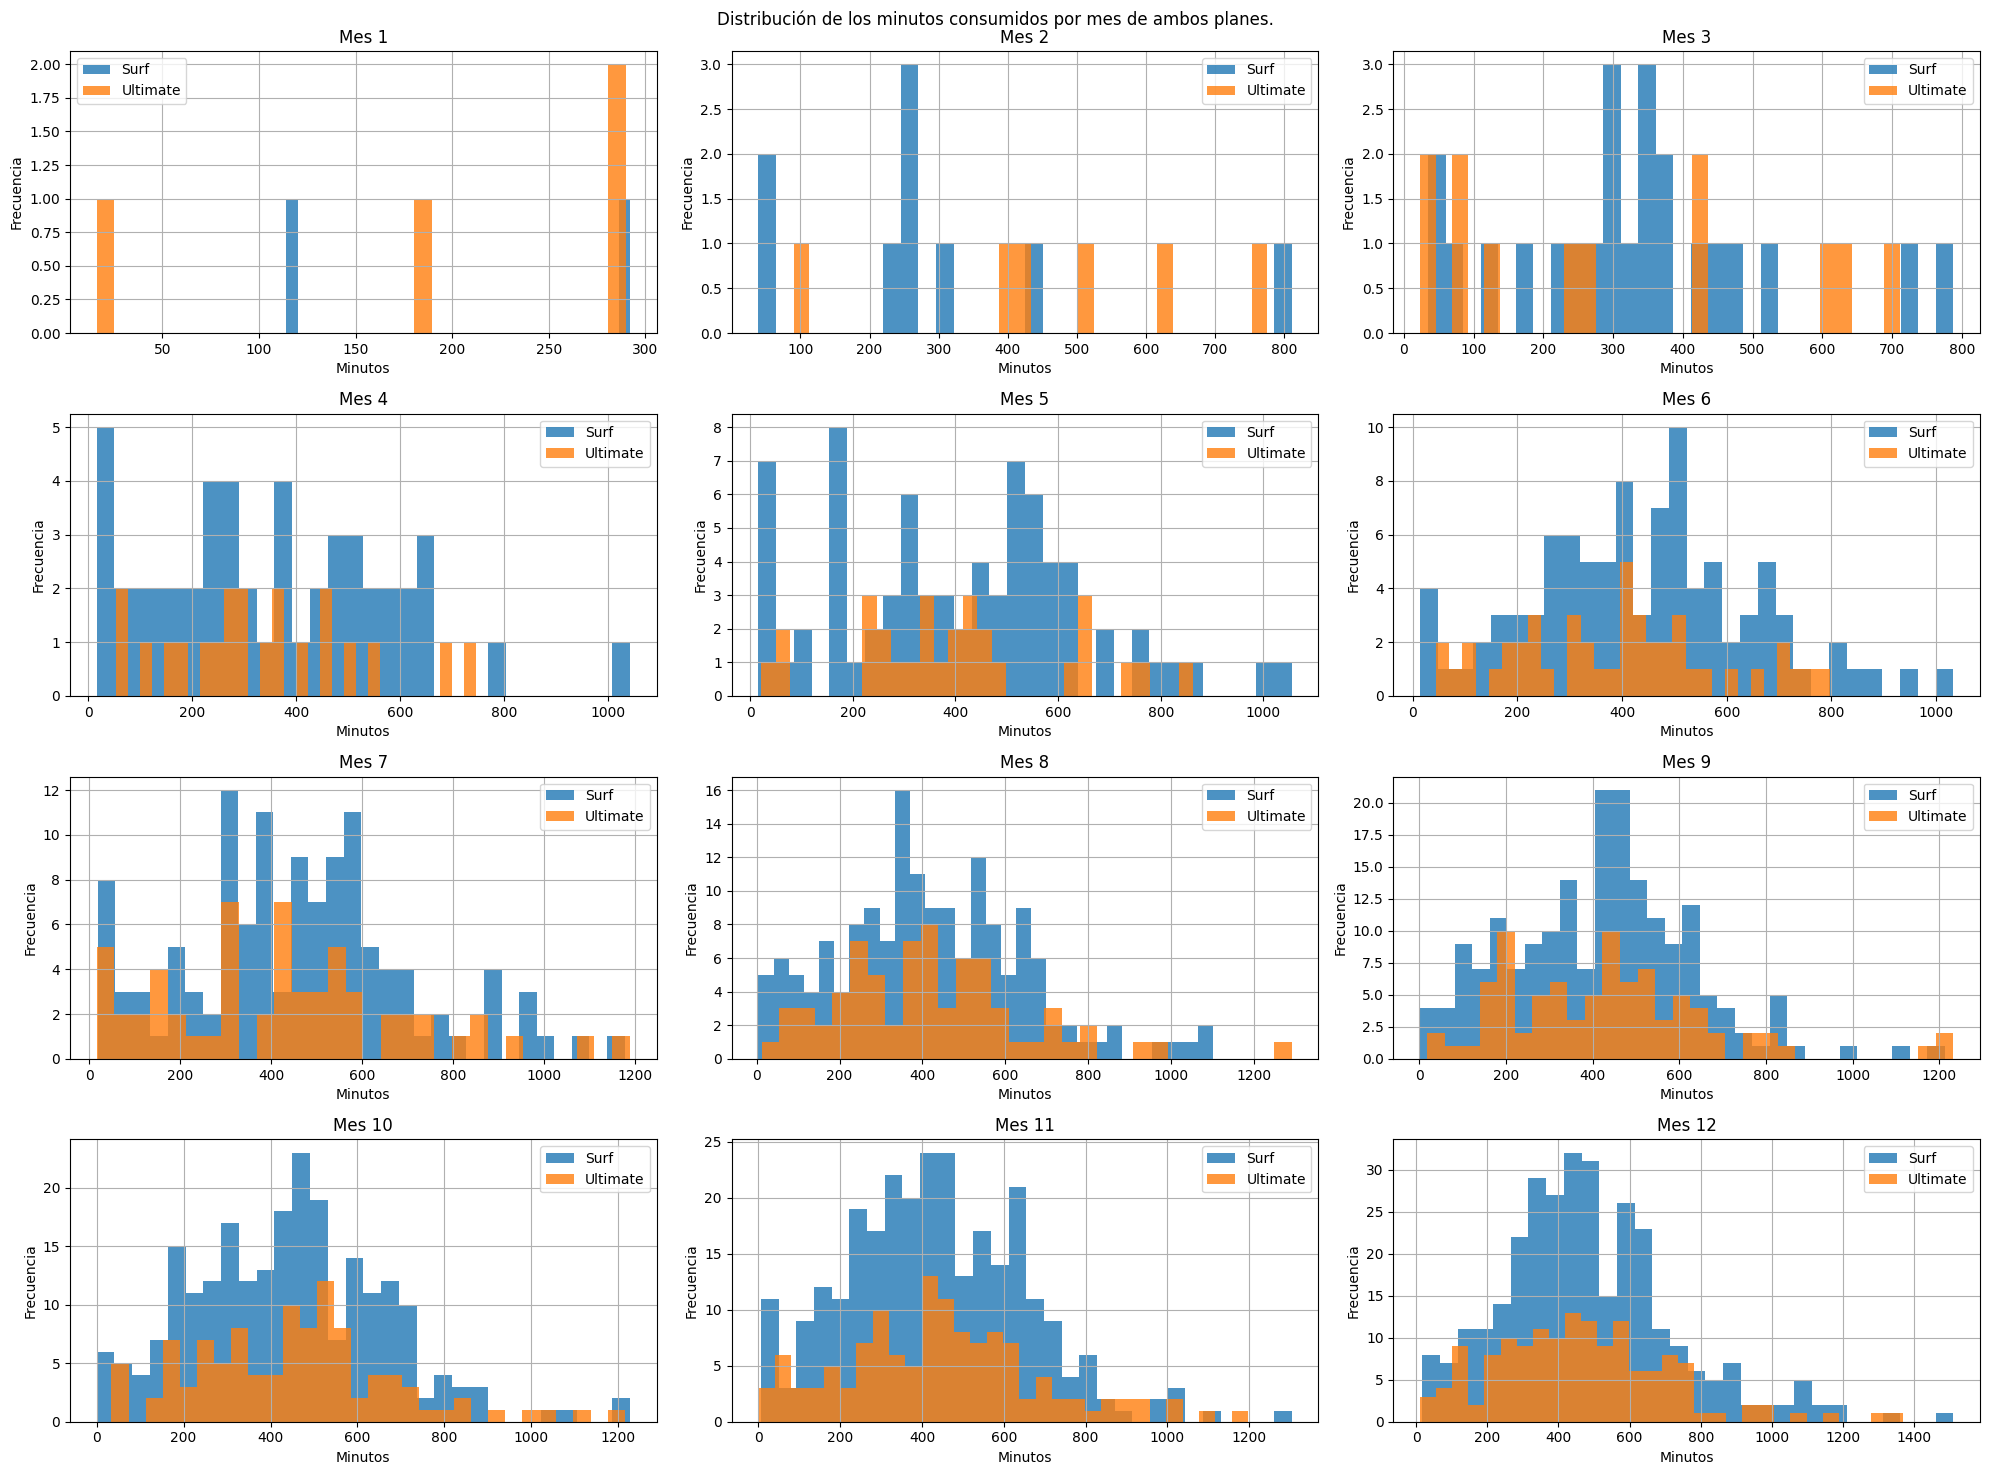

In [33]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Graficamos los datos.

#plan_consum_user_month[plan_consum_user_month['plan_name']=='surf'][['month', 'minxmonth']].hist(column='minxmonth', by='month',bins=12, figsize=(14, 10))
#plan_consum_user_month[plan_consum_user_month['plan_name']=='ultimate'][['month', 'minxmonth']].hist(column='minxmonth', by='month',bins=12, figsize=(14, 10), alpha = 0.7)

# Aquí se crea una matriz con 4 filas y 3 columnas para graficar los histogramas.
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15)) 

# Aplanamos los ejes para iterar fácilmente
axes = axes.flatten()

# Iteramos sobre los meses para crear los histogramas
for i in range(1, 13):
    ax = axes[i-1]  # Se selecciona el subplot correspondiente
    
    # Se grafican los histogramas en el subplot actual
    plan_consum_user_month[(plan_consum_user_month['plan_name']=='surf')&(plan_consum_user_month['month']==i)]['minxmonth'].plot(kind='hist', bins=30, ax=ax, label='Surf', alpha=0.8)
    plan_consum_user_month[(plan_consum_user_month['plan_name']=='ultimate')&(plan_consum_user_month['month']==i)]['minxmonth'].plot(kind='hist', bins=30, ax=ax, label='Ultimate', alpha=0.8)
    
    # Añadimos título, etiquetas y leyenda a cada subplot
    ax.set_title(f'Mes {i}')
    ax.set_xlabel('Minutos')
    ax.set_ylabel('Frecuencia')
    ax.grid()
    ax.legend()

# Ajustamos el diseño para evitar superposiciones entre subplot's.
plt.suptitle('Distribución de los minutos consumidos por mes de ambos planes.')
plt.tight_layout()
plt.show()

**Comentarios:** 
1. En la asignación, `fig, axes` se descompone en dos partes porque `plt.subplots()` devuelve dos valores: el objeto `Figure`<u>*(Es la figura global, el contenedor que puede incluir uno o varios subplots o gráficos)*</u> y el objeto `Axes`<u>*(Es una matriz de objetos de tipo Axes, donde cada Axes representa un subplot o gráfico individual dentro de la figura)*</u>. Así que `fig` y `axes` son variables que contienen esos dos valores.


2. Aplanar significa convertir la matriz bidimensional en un array unidimensional. Por ejemplo: un `axes` como una matriz 2x2, es decir, algo como `[[ax1, ax2], [ax3, ax4]]`, al aplanarla se convierte en `[ax1, ax2, ax3, ax4]`.

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [34]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Extraemos la varianza de las llamadas por cada plan y por cada mes.
surf_call_var = plan_consum_user_month[plan_consum_user_month['plan_name']=='surf'][['month', 'minxmonth']].groupby('month').var().round(2)
ultimate_call_var = plan_consum_user_month[plan_consum_user_month['plan_name']=='ultimate'][['month', 'minxmonth']].groupby('month').var().round(2)

# Fusionamos las medias de ambas duraciones de cada plan, así como sus varianzas, 
# con los mísmos índices que son los meses.
call_dur = pd.concat([surf_call_mean, 
                      surf_call_var, 
                      ultimate_call_mean,
                      ultimate_call_var], 
                      axis='columns')

# Renombramos las columnas para identificarlas más fácil.
call_dur.columns = ['surf_min_mean', 'surf_min_var', 'ultimate_min_mean', 'ultimate_min_var']

print(call_dur)
print()
print('Total del promedio de minutos por mes del plan Surf:', call_dur['surf_min_mean'].sum())
print('Total del promedio de minutos por mes del plan Ultimate:', call_dur['ultimate_min_mean'].sum())

       surf_min_mean  surf_min_var  ultimate_min_mean  ultimate_min_var
month                                                                  
1.0            406.0      15842.00              774.0          16572.33
2.0           2673.0      52226.50             2822.0          54345.07
3.0           7590.0      35809.36             3651.0          61984.93
4.0          17577.0      50866.74             7074.0          34888.93
5.0          30768.0      56938.78            11781.0          43841.05
6.0          41836.0      44094.06            17435.0          37902.57
7.0          54448.0      59802.01            25197.0          72563.37
8.0          66438.0      52122.75            29922.0          53645.51
9.0          80360.0      44579.91            37626.0          57070.46
10.0        101846.0      49326.95            47778.0          52811.57
11.0        119801.0      48748.79            56540.0          59479.78
12.0        150680.0      59882.37            69324.0          6

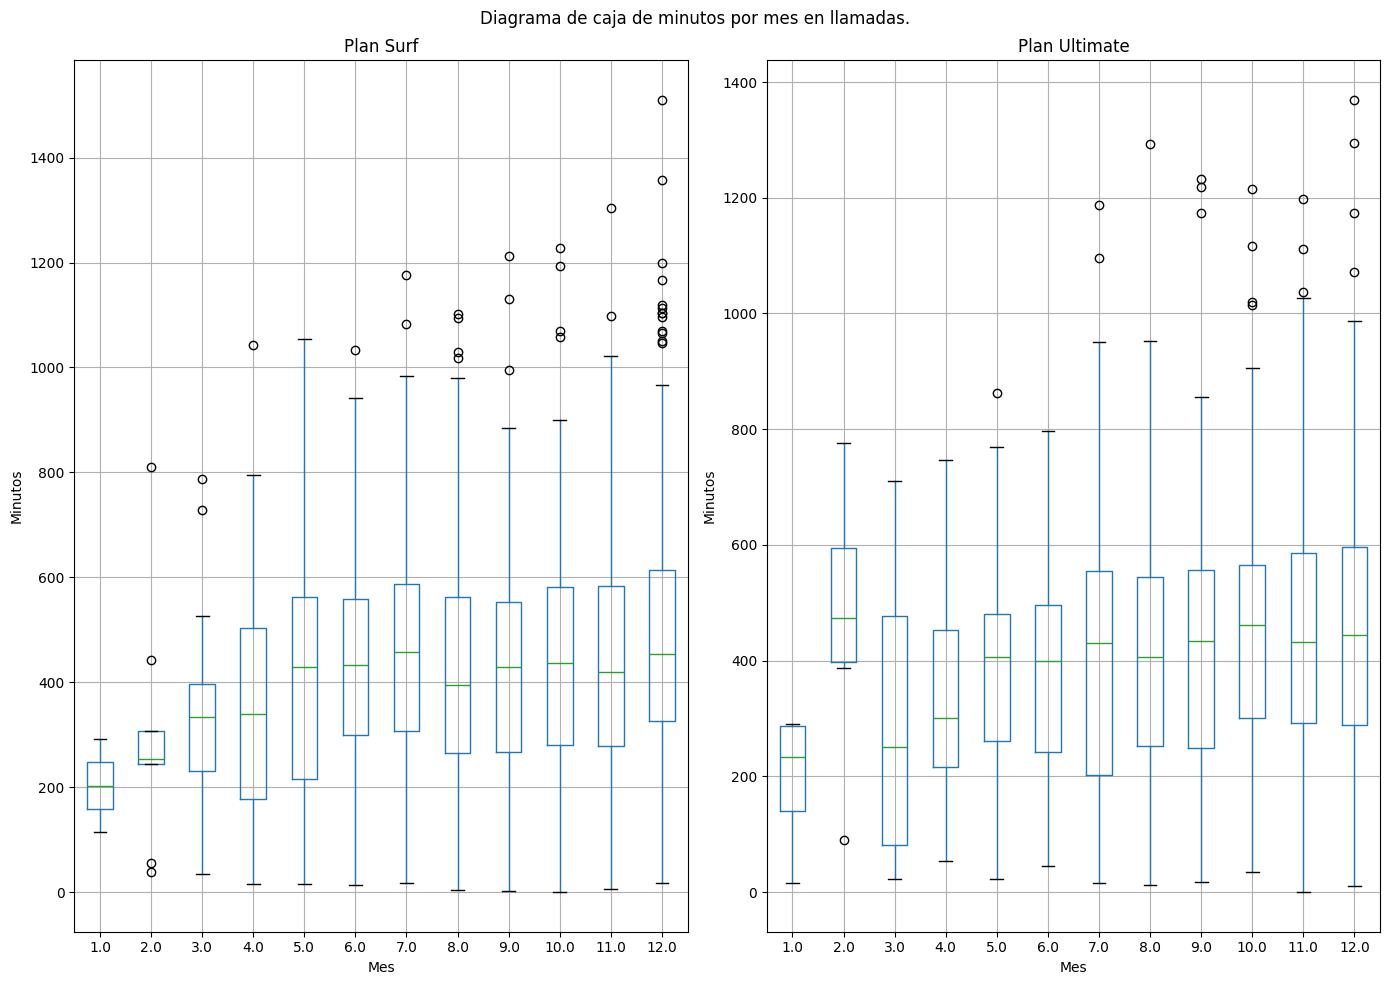

In [35]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

# Aquí se crea una matriz con 1 fila y 2 columnas para graficar los diagramas.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))

#Se asigna la primer posición de la matriz y el diagrama de caja del plan Surf.
ax=axes[0]                         

# Se genera la información suficiente y el diagrama de caja del plan Surf.
plan_consum_user_month[plan_consum_user_month['plan_name']=='surf'][['month', 'minxmonth']].boxplot(column='minxmonth', by='month', ax=ax)

# Añadimos red, etiquetas y título a la primera posición de la matriz.
ax.grid(True)
ax.set_xlabel('Mes')
ax.set_ylabel('Minutos')
ax.set_title('Plan Surf')

#Se asigna la segunda posición de la matriz y el diagrama de caja del plan Ultimate
ax=axes[1]

# Se genera la información suficiente, el diagrama de caja del plan Ultimate.
plan_consum_user_month[plan_consum_user_month['plan_name']=='ultimate'][['month', 'minxmonth']].boxplot(column='minxmonth', by='month', ax=ax)

# Añadimos red, etiquetas y título a la segunda posición de la matriz.
ax.grid(True)
ax.set_xlabel('Mes')
ax.set_ylabel('Minutos')
ax.set_title('Plan Ultimate')

# Ajustamos el diseño de todo el gráfico.
plt.suptitle('Diagrama de caja de minutos por mes en llamadas.')  # Quita el título automático de pandas
plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

**Respuesta:** Inicialmente podemos basarnos en la suma del promedio de todos los meses en los minutos por llamada de cada plan:

$$\text{Surf}=4,675.86 \text{ y Ultimate}=4,753.66$$

Aquí podemos ver que en promedio, anualmente el plan Ultimate es más rentable, a pesar de que sea el plan con menos usuarios, ¿Es esto lo correcto?.

Pues al evaluar la duración promedio de llamada por cada mes, a simple vista es fácil decir que en su mayoría tienen el mismo comportamiento. Las diferencias entre el promedio no varían por mucho, exceptuando con el mes 2 (Febrero), en el cual es obvio que el plan Ultimate tiene más minutos en llamadas.

Pero todo cambia al analizar los hsitogramas de ambos planes, pues en volumen y distribución de los datos son muy distintos. Aquí notamos dos cosas: 
1. El plan Surf tiene una mayor frecuencia y un mayor rango en sus datos (exceptuando en enero) en comparación al plan Ultimate. Esto tiene lógica, ya que es el plan con mayor número de usuarios.
2. El plan Surf se acerca a una distribución normal en la mayoría de los meses, pues el volumen de los datos es más grande que el plan Ultimate. Mientras que el plan Ultimate, es difícil identificar el tipo de distribución que genera el volumen de sus datos.

Otro aspecto a considerar es la desviación estandar de los datos de cada plan. Se comprueba que la varianza del plan Ultimate es mayor al Surf. Esto nos indica que hay una menor distancia entre la media y los datos del plan Surf,  en comparación al plan Ultimate.

Finalmente, los diagramas de caja nos confirman lo anterior mencionado y algo aún más importante: 

* <u>Dado que el plan Surf tien como límite 500 minutos, a partir del mes 2 (Febrero) ya existe un consumo excesivo en los minutos, mes a mes va aumentando la cantidad de usuarios que superan su límite de minutos y provocando que se tenga que pagar penalizaciones por tiempo extra. Además, siendo éste el plan con mayor número de usuarios genera una mayor rentabilidad. Mientras que el plan Ultimate, tiene como límite 3,000 minutos y en ningun momento se exceden</u>. 

Con esto, podemos afirmar con certeza que el comportamiento de los usuarios varía en función del plan que se haya contratado.

**En conclusión, los datos reflejan que en minutos de llamadas, es mucho más rentable el plan Surf, con un mayor número de usuarios y una menor disperción en sus datos.**

### Mensajes

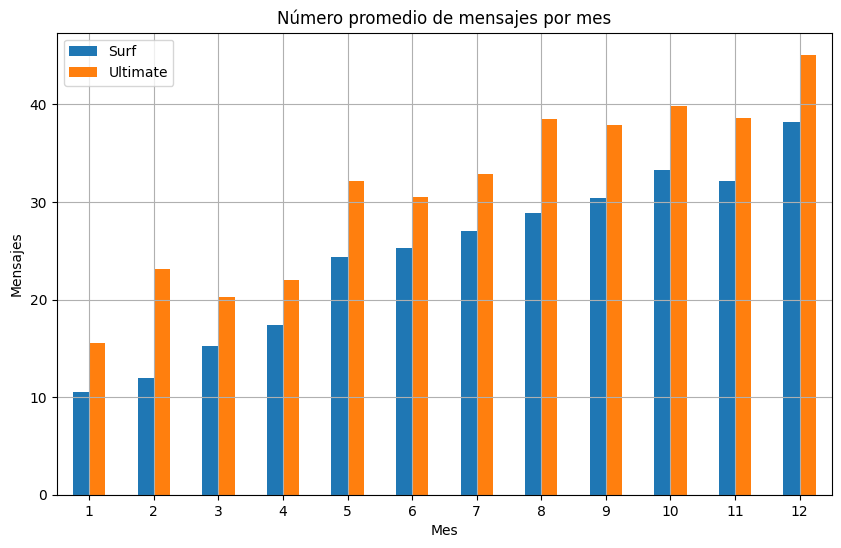

In [36]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Extraemos la cantidad promedio de mensajes por cada plan y por cada mes.
surf_msn_mean = plan_consum_user_month[plan_consum_user_month['plan_name']=='surf'][['month', 'messagesxmonth']].groupby('month').mean().round(2)
ultimate_msn_mean = plan_consum_user_month[plan_consum_user_month['plan_name']=='ultimate'][['month', 'messagesxmonth']].groupby('month').mean().round(2)

# Fusionamos ambas cantidades medias de cada plan con los mísmos índices que son los meses.
msn_num = pd.concat([surf_msn_mean, ultimate_msn_mean], axis='columns')

# Las renombramos para identificarlas más fácil.
msn_num.columns = ['surf_msn_mean', 'ultimate_msn_mean']

# El índice lo convertimos en entero para que sea más claro el gráfico.
msn_num.index = msn_num.index.astype(int)

# Graficamos los datos.
msn_num.plot(kind = 'bar', 
              title = 'Número promedio de mensajes por mes', 
              xlabel = 'Mes', 
              ylabel = 'Mensajes', 
              rot=360, 
              figsize=(10, 6))
plt.grid()
plt.legend(['Surf', 'Ultimate'])
plt.show()

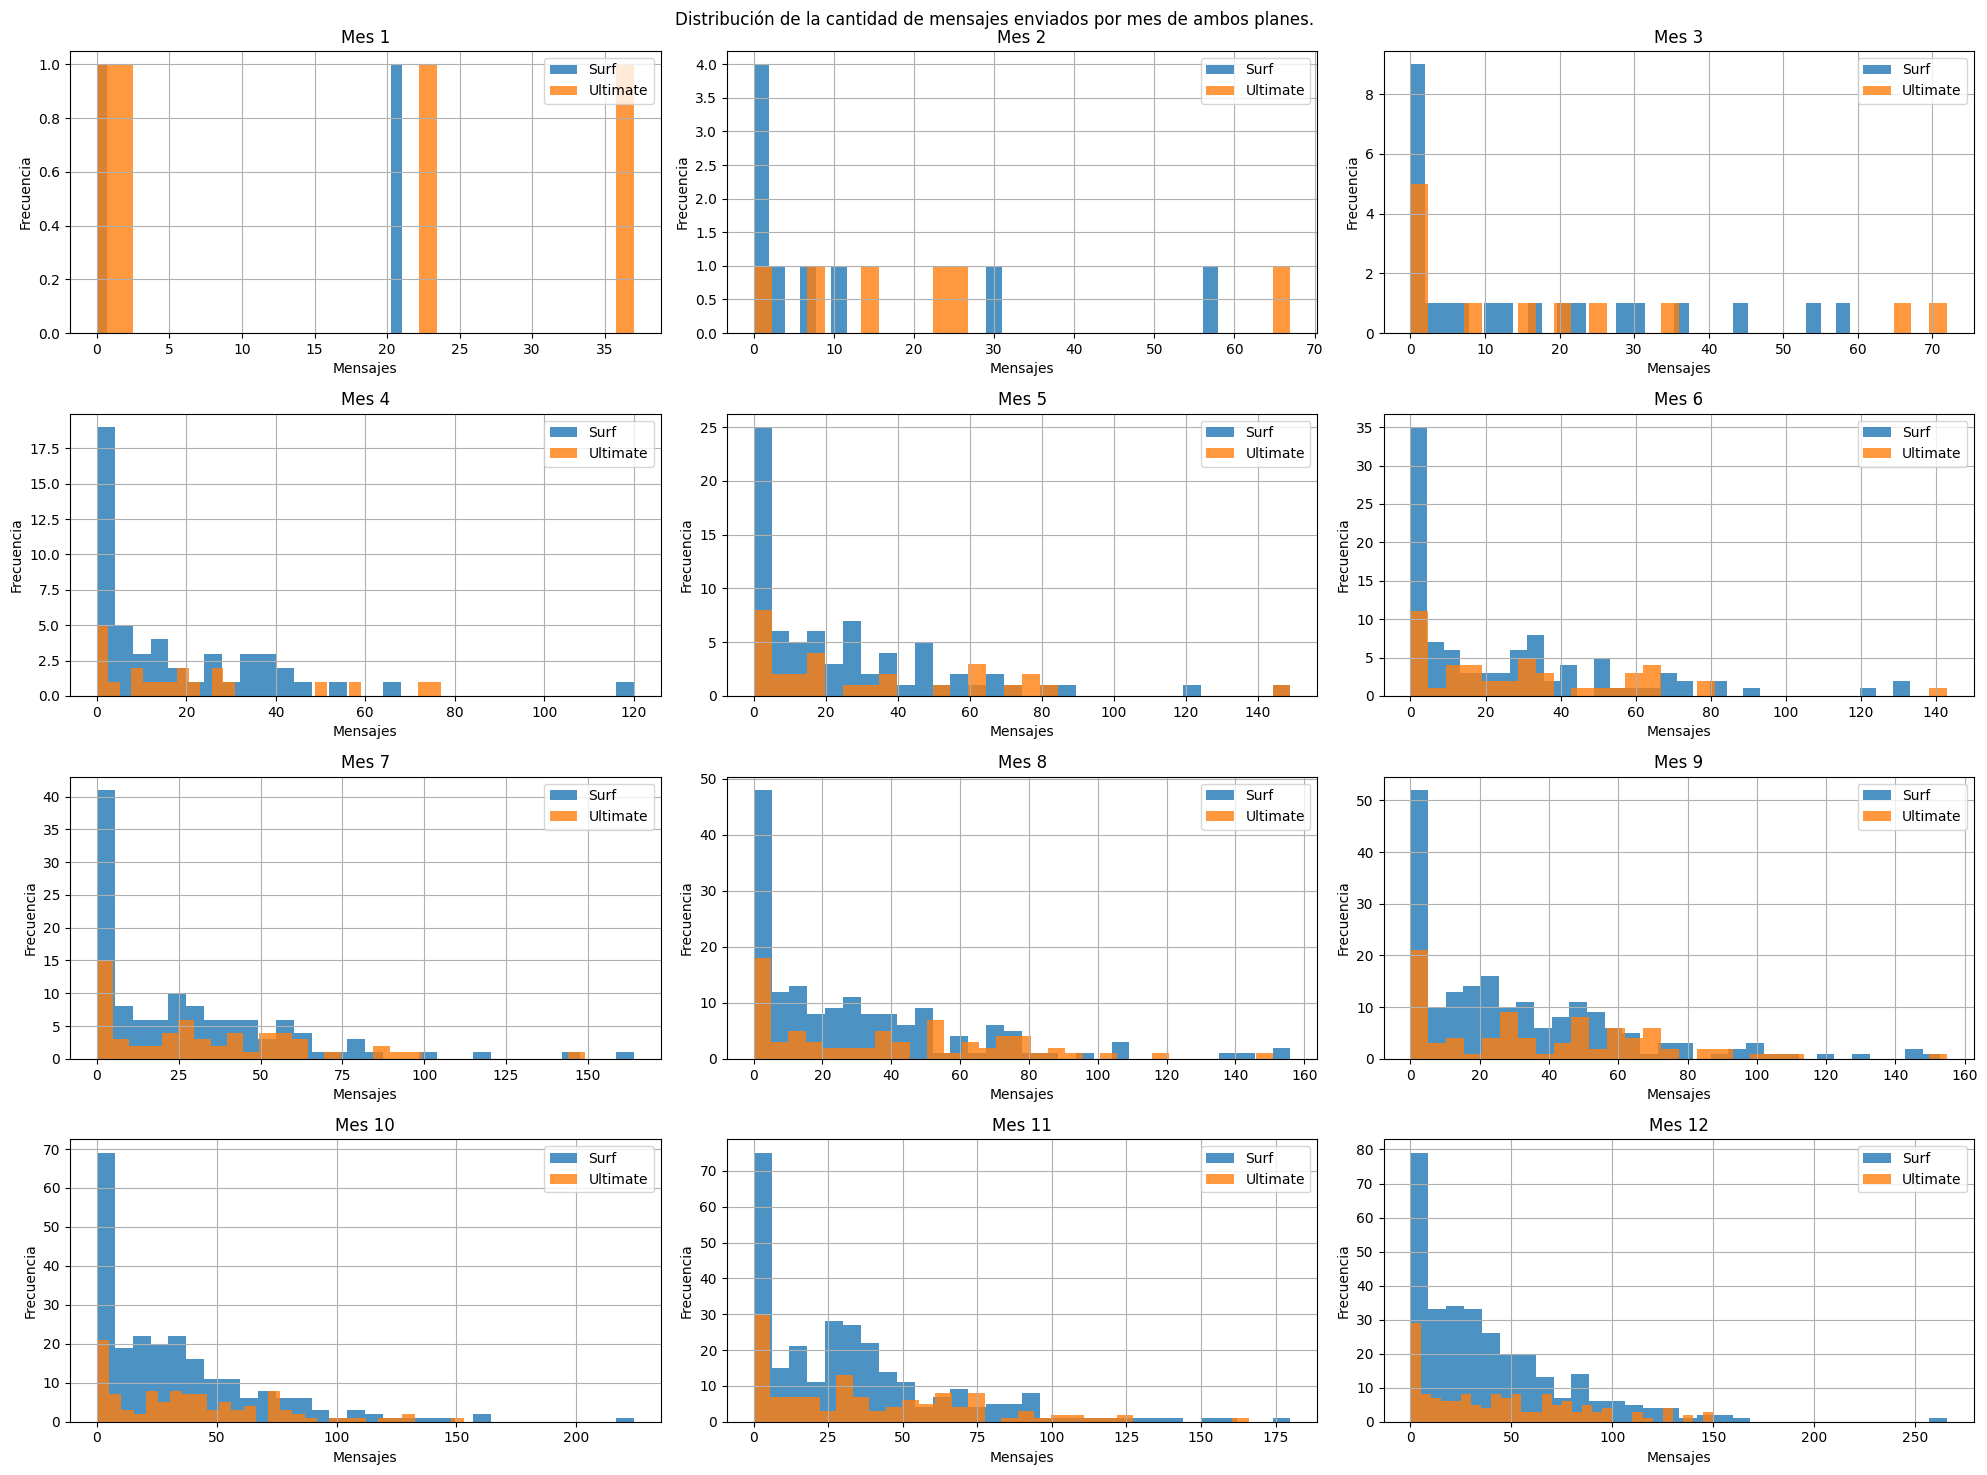

In [37]:
# Compararemos la distribución del número de mensajes mensuales que se mandan en cada plan, utilizando histogramas.

# Aquí se crea una matriz con 4 filas y 3 columnas para graficar los histogramas.
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15)) 

# Aplanamos los ejes para iterar fácilmente
axes = axes.flatten()

# Iteramos sobre los meses para crear los histogramas
for i in range(1, 13):
    ax = axes[i-1]  # Se selecciona el subplot correspondiente
    
    # Se grafican los histogramas en el subplot actual
    plan_consum_user_month[(plan_consum_user_month['plan_name']=='surf')&(plan_consum_user_month['month']==i)]['messagesxmonth'].plot(kind='hist', bins=30, ax=ax, label='Surf', alpha=0.8)
    plan_consum_user_month[(plan_consum_user_month['plan_name']=='ultimate')&(plan_consum_user_month['month']==i)]['messagesxmonth'].plot(kind='hist', bins=30, ax=ax, label='Ultimate', alpha=0.8)
    
    # Añadimos título, etiquetas y leyenda a cada subplot
    ax.set_title(f'Mes {i}')
    ax.set_xlabel('Mensajes')
    ax.set_ylabel('Frecuencia')
    ax.grid()
    ax.legend()

# Ajustamos el diseño para evitar superposiciones entre subplot's.
plt.suptitle('Distribución de la cantidad de mensajes enviados por mes de ambos planes.')
plt.tight_layout()
plt.show()

In [38]:
# Calcularemos la media y la varianza de la cantidad de mensajes.

# Extraemos la varianza de los mensajes por cada plan y por cada mes.
surf_msn_var = plan_consum_user_month[plan_consum_user_month['plan_name']=='surf'][['month', 'messagesxmonth']].groupby('month').var().round(2)
ultimate_msn_var = plan_consum_user_month[plan_consum_user_month['plan_name']=='ultimate'][['month', 'messagesxmonth']].groupby('month').var().round(2)

# Fusionamos las medias de ambas cantidades de cada plan, así como sus varianzas, con los mísmos índices que son los meses.
msn_num = pd.concat([surf_msn_mean, 
                      surf_msn_var, 
                      ultimate_msn_mean,
                      ultimate_msn_var], 
                      axis='columns')

# Renombramos las columnas para identificarlas más fácil.
msn_num.columns = ['surf_msn_mean', 'surf_msn_var', 'ultimate_msn_mean', 'ultimate_msn_var']

print(msn_num)
print()
print('Total del promedio de mensajes por mes del plan Surf:', msn_num['surf_msn_mean'].sum().round(2))
print('Total del promedio de mensajes por mes del plan Ultimate:', msn_num['ultimate_msn_mean'].sum().round(2))

       surf_msn_mean  surf_msn_var  ultimate_msn_mean  ultimate_msn_var
month                                                                  
1.0            10.50        220.50              15.50            313.67
2.0            12.00        386.00              23.17            552.57
3.0            15.26        346.57              20.25            654.39
4.0            17.40        501.59              22.05            544.15
5.0            24.39        862.92              32.10           1297.31
6.0            25.28        924.52              30.53            862.12
7.0            27.02        931.67              32.83            960.49
8.0            28.86       1046.68              38.48           1196.37
9.0            30.38       1002.83              37.90           1050.92
10.0           33.27       1278.71              39.80           1219.24
11.0           32.12       1070.70              38.58           1242.44
12.0           38.21       1474.21              45.09           

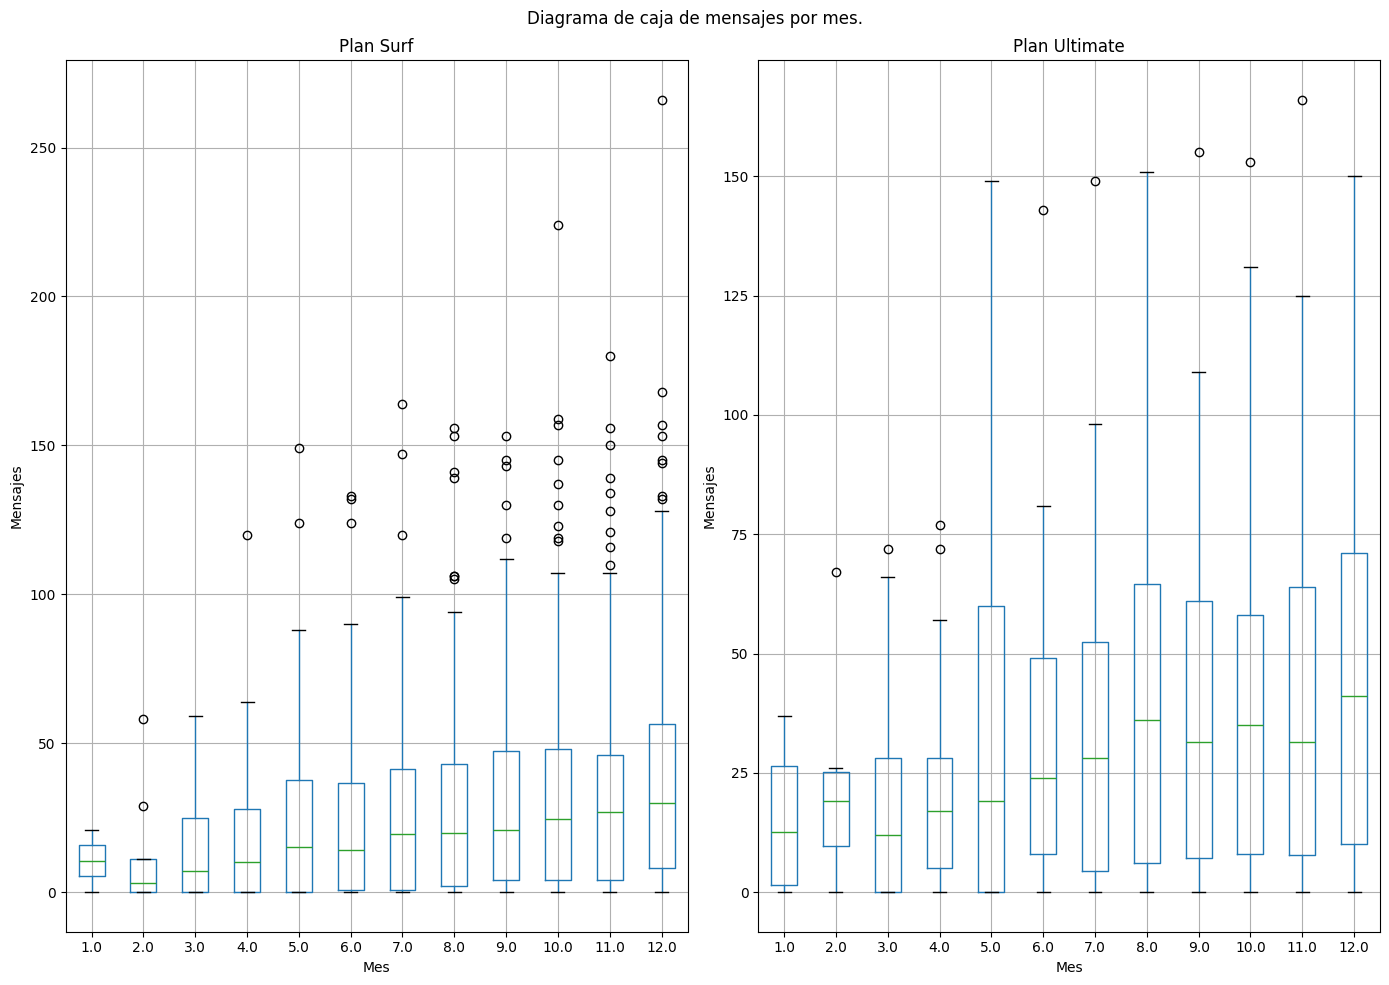

In [39]:
# Haremos dos diagramas de caja para visualizar la distribución de la cantidad mensual de mensajes

# Aquí se crea una matriz con 1 fila y 2 columnas para graficar los diagramas.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))

#Se asigna la primer posición de la matriz y el diagrama de caja del plan Surf.
ax=axes[0]                         

# Se genera la información suficiente y el diagrama de caja del plan Surf.
plan_consum_user_month[plan_consum_user_month['plan_name']=='surf'][['month', 'messagesxmonth']].boxplot(column='messagesxmonth', by='month', ax=ax)

# Añadimos red, etiquetas y título a la primera posición de la matriz.
ax.grid(True)
ax.set_xlabel('Mes')
ax.set_ylabel('Mensajes')
ax.set_title('Plan Surf')

#Se asigna la segunda posición de la matriz y el diagrama de caja del plan Ultimate
ax=axes[1]

# Se genera la información suficiente, el diagrama de caja del plan Ultimate.
plan_consum_user_month[plan_consum_user_month['plan_name']=='ultimate'][['month', 'messagesxmonth']].boxplot(column='messagesxmonth', by='month', ax=ax)

# Añadimos red, etiquetas y título a la segunda posición de la matriz.
ax.grid(True)
ax.set_xlabel('Mes')
ax.set_ylabel('Mensajes')
ax.set_title('Plan Ultimate')

# Ajustamos el diseño de todo el gráfico.
plt.suptitle('Diagrama de caja de mensajes por mes.')  # Quita el título automático de pandas
plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

**Respuesta:** De manera similar a las llamadas, la primer gráfica "número promedio de mensajes por mes" pareciera que el plan Ultimate es el más rentable por la cantidad de mensajes que se mandan al mes. Sin embargo, todo cambia al analizar la distribución de los datos en los histogramas y en los diagramas de caja. 
* En los histogramas, no se logra identificar una distribución clara para ambos planes, no obstante, se identifica una mayor varianza en los datos del plan Ultimate. También, se puede observar que hay una cantidad considerable de casos en los que el número de mensajes del plan Surf superan el límite permitidoal mes, que son 50 mensajes.
* En los diagramas de caja confirmamos lo analizado en el punto anterior. Al igual que en el caso de las llmadas, podemos notar que a partir del mes 2 ya existe un exceso en el límite de mensajes permitidos en el plan Surf, siendo los últimos meses (a partir del mes 8) aquellos con mayor cantidad de pagos extras. Mientras que los usuarios del plan Ultimate, nunca superan el límite de la cantidad de mensajes permitidos.

Con esto, podemos afirmar con certeza que el comportamiento de los usuarios varía en función del plan que se haya contratado.

**En conclusión, los datos reflejan que en número de mensajes, es mucho más rentable el plan Surf, con un mayor número de usuarios y una menor disperción en sus datos.**

### Internet

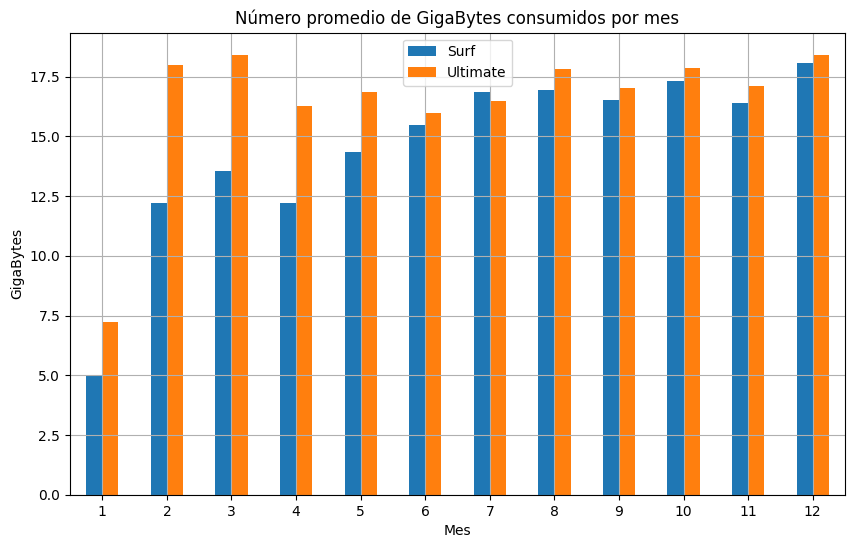

In [40]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

# Extraemos la cantidad promedio de gigabytes por cada plan y por cada mes.
surf_gb_mean = plan_consum_user_month[plan_consum_user_month['plan_name']=='surf'][['month', 'gbxmonth']].groupby('month').mean().round(2)
ultimate_gb_mean = plan_consum_user_month[plan_consum_user_month['plan_name']=='ultimate'][['month', 'gbxmonth']].groupby('month').mean().round(2)

# Fusionamos ambas cantidades medias de cada plan con los mísmos índices que son los meses.
gb_num = pd.concat([surf_gb_mean, ultimate_gb_mean], axis='columns')

# Las renombramos para identificarlas más fácil.
gb_num.columns = ['surf_gb_mean', 'ultimate_gb_mean']

# El índice lo convertimos en entero para que sea más claro el gráfico.
gb_num.index = gb_num.index.astype(int)

# Graficamos los datos.
gb_num.plot(kind = 'bar', 
              title = 'Número promedio de GigaBytes consumidos por mes', 
              xlabel = 'Mes', 
              ylabel = 'GigaBytes', 
              rot=360, 
              figsize=(10, 6))
plt.grid()
plt.legend(['Surf', 'Ultimate'])
plt.show()

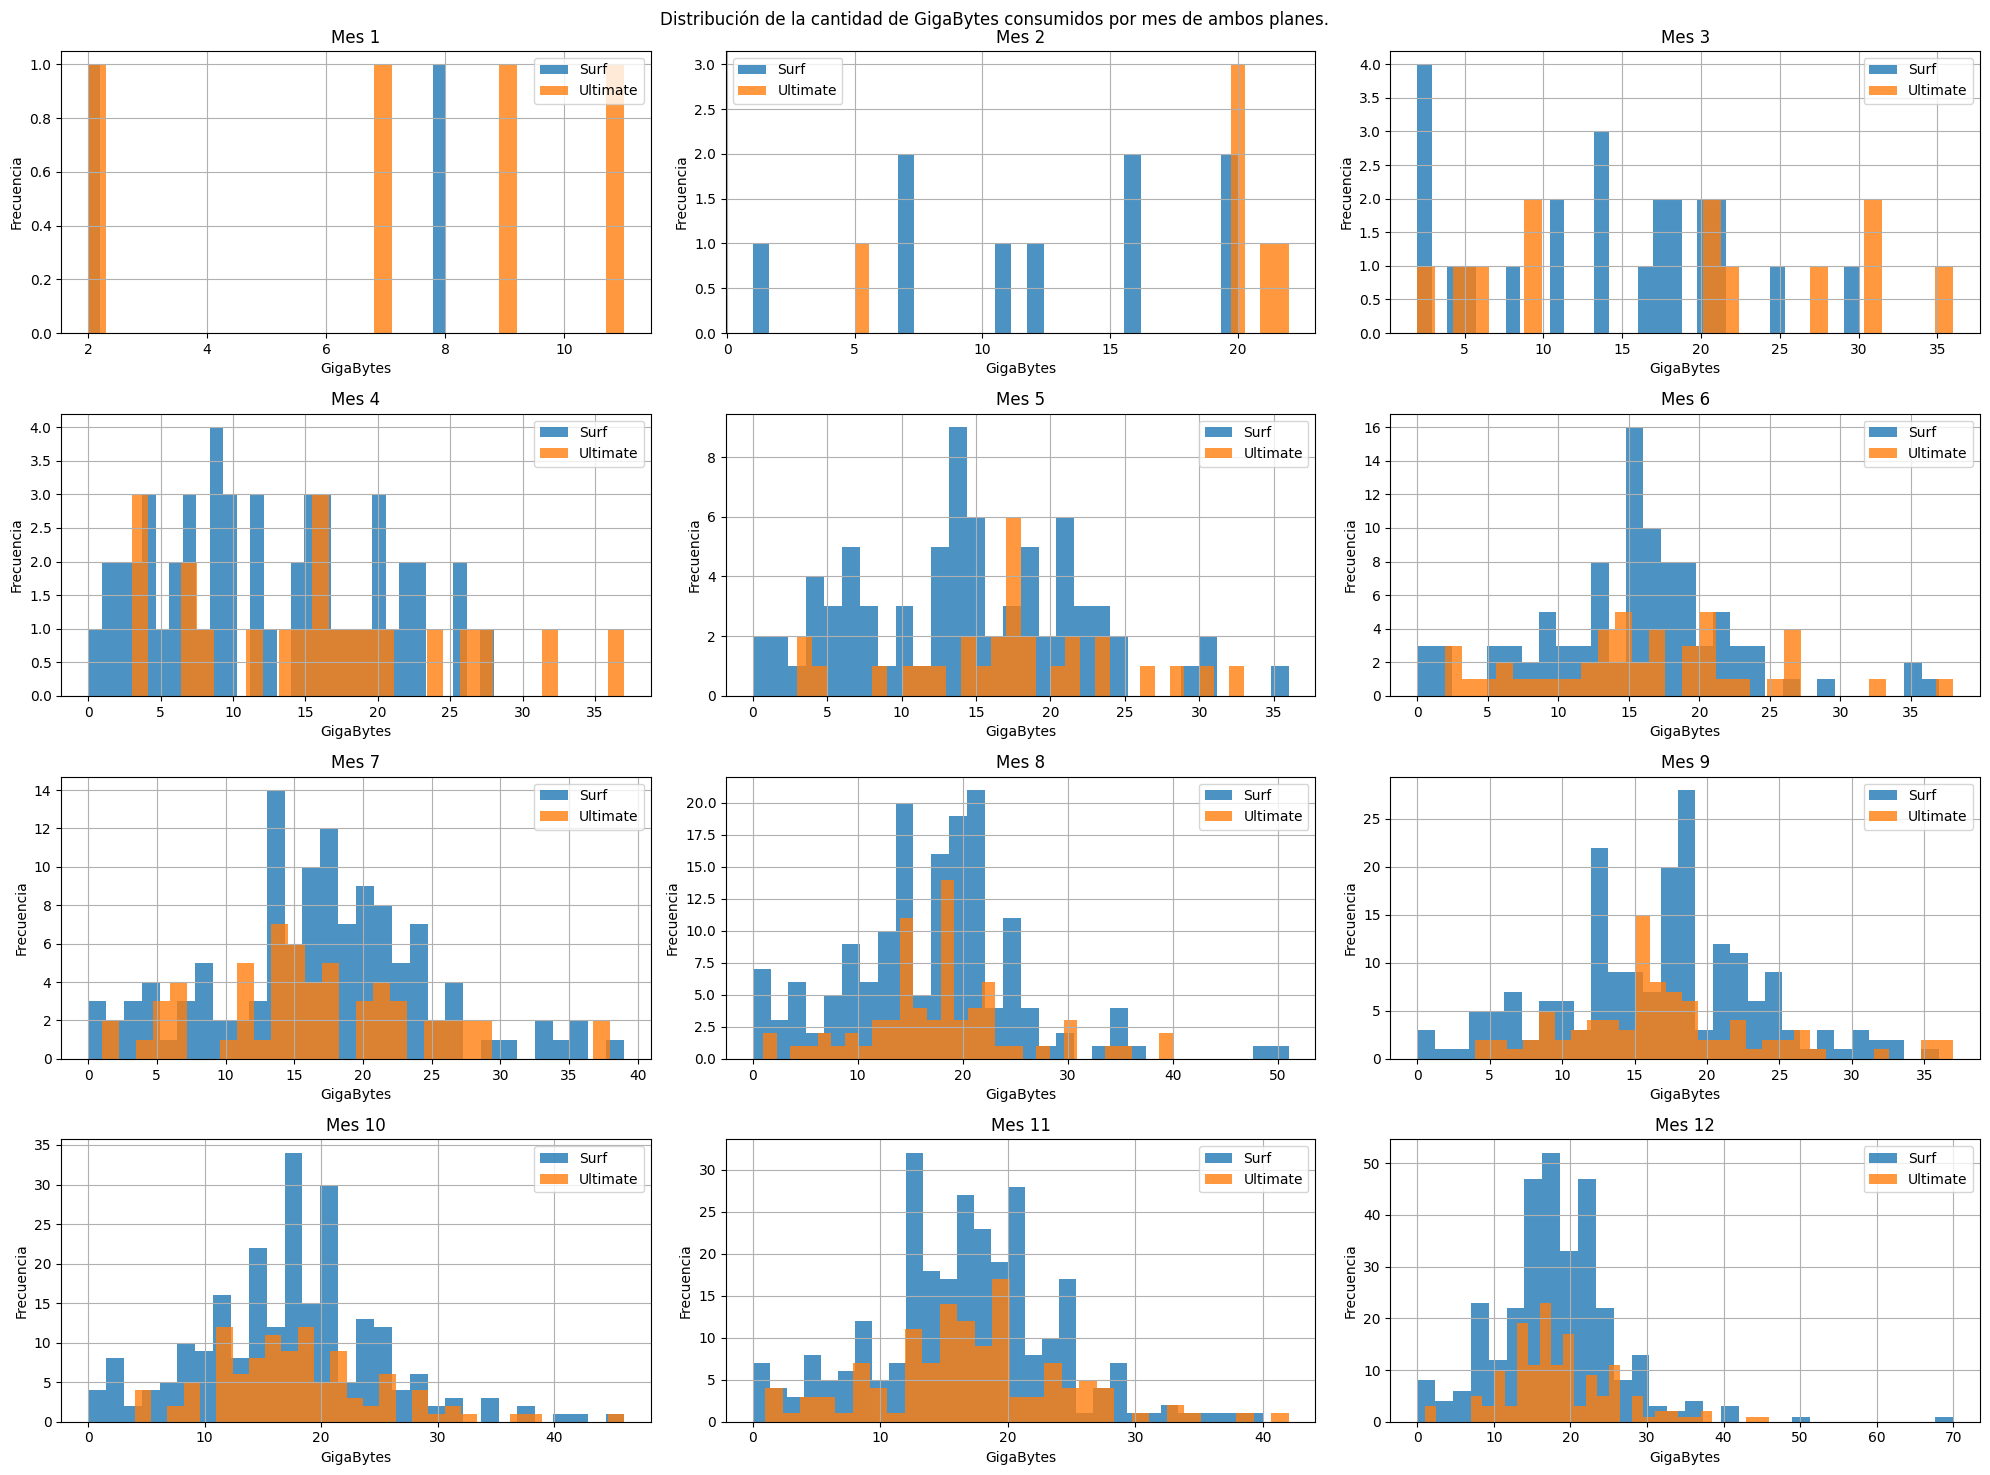

In [41]:
# Compararemos la distribución del número de gigabytes mensuales que se consumen en cada plan, utilizando histogramas.

# Aquí se crea una matriz con 4 filas y 3 columnas para graficar los histogramas.
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15)) 

# Aplanamos los ejes para iterar fácilmente
axes = axes.flatten()

# Iteramos sobre los meses para crear los histogramas
for i in range(1, 13):
    ax = axes[i-1]  # Se selecciona el subplot correspondiente
    
    # Se grafican los histogramas en el subplot actual
    plan_consum_user_month[(plan_consum_user_month['plan_name']=='surf')&(plan_consum_user_month['month']==i)]['gbxmonth'].plot(kind='hist', bins=30, ax=ax, label='Surf', alpha=0.8)
    plan_consum_user_month[(plan_consum_user_month['plan_name']=='ultimate')&(plan_consum_user_month['month']==i)]['gbxmonth'].plot(kind='hist', bins=30, ax=ax, label='Ultimate', alpha=0.8)
    
    # Añadimos título, etiquetas y leyenda a cada subplot
    ax.set_title(f'Mes {i}')
    ax.set_xlabel('GigaBytes')
    ax.set_ylabel('Frecuencia')
    ax.grid()
    ax.legend()

# Ajustamos el diseño para evitar superposiciones entre subplot's.
plt.suptitle('Distribución de la cantidad de GigaBytes consumidos por mes de ambos planes.')
plt.tight_layout()
plt.show()

In [42]:
# Calcularemos la media y la varianza de la cantidad de gigabytes.

# Extraemos la varianza de los gigabytes por cada plan y por cada mes.
surf_gb_var = plan_consum_user_month[plan_consum_user_month['plan_name']=='surf'][['month', 'gbxmonth']].groupby('month').var().round(2)
ultimate_gb_var = plan_consum_user_month[plan_consum_user_month['plan_name']=='ultimate'][['month', 'gbxmonth']].groupby('month').var().round(2)

# Fusionamos las medias de ambas cantidades de cada plan, así como sus varianzas, con los mísmos índices que son los meses.
gb_num = pd.concat([surf_gb_mean, 
                      surf_gb_var, 
                      ultimate_gb_mean,
                      ultimate_gb_var], 
                      axis='columns')

# Renombramos las columnas para identificarlas más fácil.
gb_num.columns = ['surf_gb_mean', 'surf_gb_var', 'ultimate_gb_mean', 'ultimate_gb_var']

print(gb_num)
print()
print('Total del promedio de GigaBytes por mes del plan Surf:', gb_num['surf_gb_mean'].sum().round(2))
print('Total del promedio de GigaBytes por mes del plan Ultimate:', gb_num['ultimate_gb_mean'].sum().round(2))

       surf_gb_mean  surf_gb_var  ultimate_gb_mean  ultimate_gb_var
month                                                              
1.0            5.00        18.00              7.25            14.92
2.0           12.22        41.44             18.00            41.20
3.0           13.57        63.98             18.42           138.63
4.0           12.22        56.22             16.29            86.61
5.0           14.36        56.91             16.86            54.19
6.0           15.49        48.25             16.00            64.05
7.0           16.88        61.99             16.49            64.25
8.0           16.96        71.76             17.82            58.21
9.0           16.52        47.30             17.01            47.26
10.0          17.33        59.89             17.88            52.05
11.0          16.38        51.17             17.09            54.70
12.0          18.08        62.42             18.39            55.54

Total del promedio de GigaBytes por mes del pla

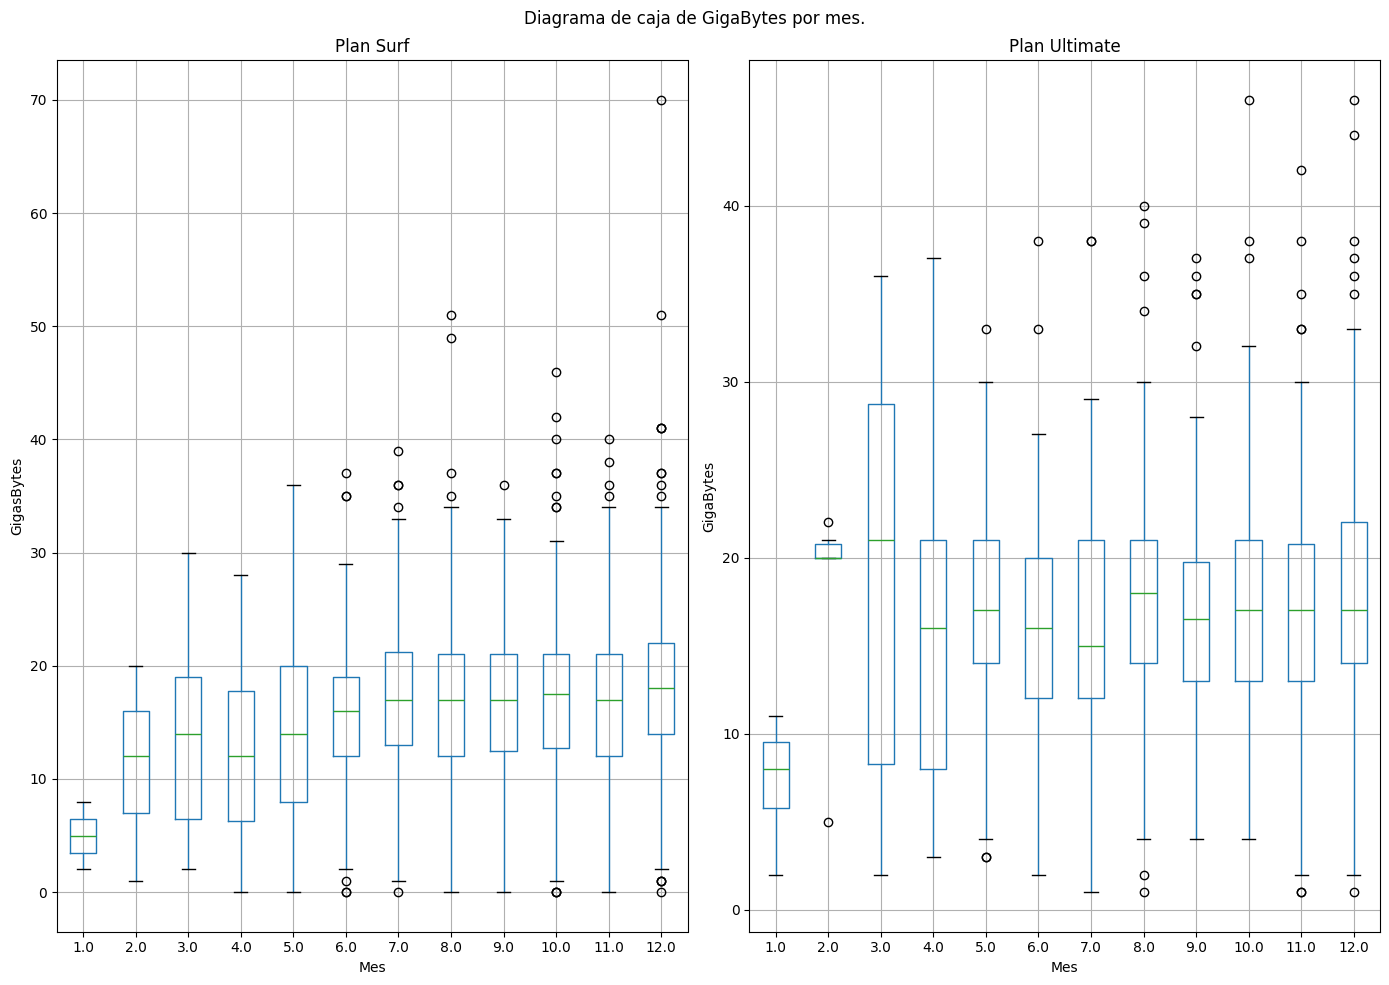

In [43]:
# Haremos dos diagramas de caja para visualizar la distribución de la cantidad mensual de gigabytes

# Aquí se crea una matriz con 1 fila y 2 columnas para graficar los diagramas.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))

#Se asigna la primer posición de la matriz y el diagrama de caja del plan Surf.
ax=axes[0]                         

# Se genera la información suficiente y el diagrama de caja del plan Surf.
plan_consum_user_month[plan_consum_user_month['plan_name']=='surf'][['month', 'gbxmonth']].boxplot(column='gbxmonth', by='month', ax=ax)

# Añadimos red, etiquetas y título a la primera posición de la matriz.
ax.grid(True)
ax.set_xlabel('Mes')
ax.set_ylabel('GigasBytes')
ax.set_title('Plan Surf')

#Se asigna la segunda posición de la matriz y el diagrama de caja del plan Ultimate
ax=axes[1]

# Se genera la información suficiente, el diagrama de caja del plan Ultimate.
plan_consum_user_month[plan_consum_user_month['plan_name']=='ultimate'][['month', 'gbxmonth']].boxplot(column='gbxmonth', by='month', ax=ax)

# Añadimos red, etiquetas y título a la segunda posición de la matriz.
ax.grid(True)
ax.set_xlabel('Mes')
ax.set_ylabel('GigaBytes')
ax.set_title('Plan Ultimate')

# Ajustamos el diseño de todo el gráfico.
plt.suptitle('Diagrama de caja de GigaBytes por mes.')  # Quita el título automático de pandas
plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

**Respuesta:** En la primer gráfica "Número promedio de GigaBytes consumidos por mes" podemos deducir que en promedio el plan Ultimate es el que más consume gigabytes, además siguen un mismo comportamiento.

En la segunda gráfica "Distribución de la cantidad de GigaBytes consumidos por mes de ambos planes" podemos observar que en la mayoría de los meses, ambos planes siguen una distribución normal. También podemos notar que en ambos planes se superan los límites permitidos de consumo después de los primeros 3 meses.

En la tercer gráfica "Diagrama de caja de GigaBytes por mes" podemos confirmar lo anteriormente analizado, pues ambos planes superan de manera muy alta el límite de consumo en gigabytes, siendo el plan Ultimate el que consume un mayor número de gigas. Esto sólo nos indica que el servicio de internet es el que genera mayores ganancias por parte de ambos planes.

Con esto, podemos afirmar con certeza que el comportamiento de los usuarios varía en función del plan que se haya contratado.

**En conclusión, no podemos afirmar o asegurar cuál plan será el más rentable pues en ambos tienen pagos extras de consumo de internet.**

## Ingreso

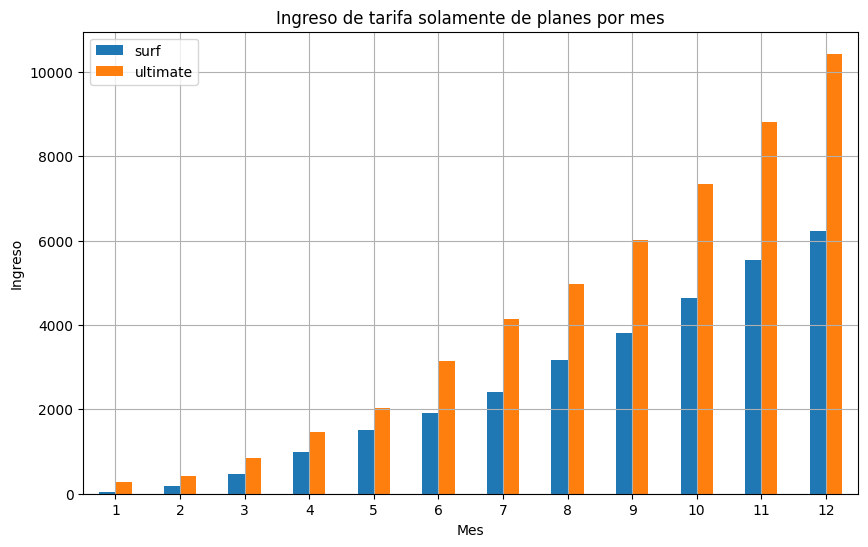

In [44]:
# Precios de planes y usuarios totales al mes

# Extraemos el número de usuarios por cada plan y por cada mes.
plan_income_surf = plan_consum_user_month[plan_consum_user_month['plan_name']=='surf'][['month', 'user_id']].groupby('month').count()
plan_income_ultimate = plan_consum_user_month[plan_consum_user_month['plan_name']=='ultimate'][['month', 'user_id']].groupby('month').count()

# Fusionamos ambos DataFrames de cada plan con los mísmos índices que son los meses.
plan_income = pd.concat([plan_income_surf, plan_income_ultimate], axis='columns')

# Las renombramos para identificarlas más fácil.
plan_income.columns = ['surf', 'ultimate']

# El índice lo convertimos en entero para que sea más claro el gráfico.
plan_income.index = plan_income.index.astype(int)

# Calculamos el ingreso por el puro plan y número de usuarios al mes.
plan_income['surf']=plan_income['surf']*20
plan_income['ultimate']=plan_income['ultimate']*70

# Graficamos los datos.
plan_income.plot(kind='bar',
                 title = 'Ingreso de tarifa solamente de planes por mes', 
                 xlabel = 'Mes', 
                 ylabel = 'Ingreso', 
                 rot=360, 
                 figsize=(10, 6))
plt.grid()
plt.show()

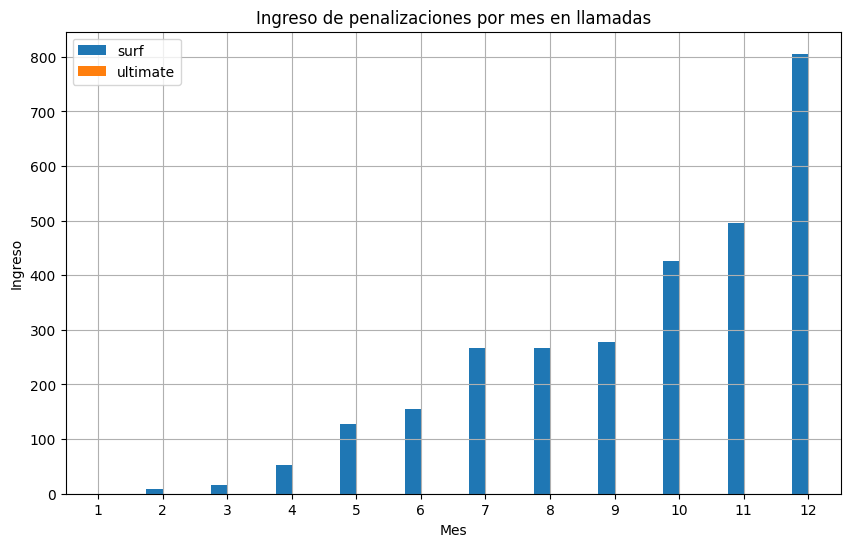

In [45]:
# Analizaremos las penalizaciones de llamadas al mes

# Creamos e inicializamos la columna para guardar los ingresos por penalizaciones de las llamadas.
plan_consum_user_month['income_pen_call'] = 0

# Llamadas plan Surf -> 500 permitidos // $0.03 por minuto
plan_consum_user_month['income_pen_call'] = np.where(
    ((plan_consum_user_month['plan_name'] == 'surf') & (plan_consum_user_month['minxmonth']>500)), 
    plan_consum_user_month['income_pen_call'] + (plan_consum_user_month['minxmonth']-500)*0.03,
    plan_consum_user_month['income_pen_call'])

# Llamadas plan Ultimate -> 3000 permitidos // $0.01 por minuto
plan_consum_user_month['income_pen_call'] = np.where(
    ((plan_consum_user_month['plan_name'] == 'ultimate') & (plan_consum_user_month['minxmonth']>3000)), 
    plan_consum_user_month['income_pen_call'] + (plan_consum_user_month['minxmonth']-3000)*0.01,
    plan_consum_user_month['income_pen_call'])

# Extraemos el total de penalizaciones de llamadas, por plan y por cada mes.
surf_income_call_pen = plan_consum_user_month[plan_consum_user_month['plan_name']=='surf'][['month', 'income_pen_call']].groupby('month').sum().round(2)
ultimate_income_call_pen = plan_consum_user_month[plan_consum_user_month['plan_name']=='ultimate'][['month', 'income_pen_call']].groupby('month').sum().round(2)

# Fusionamos ambos DataFrames de cada plan con los mísmos índices que son los meses.
income_call_pen = pd.concat([surf_income_call_pen, ultimate_income_call_pen], axis='columns')

# Las renombramos para identificarlas más fácil.
income_call_pen.columns = ['surf', 'ultimate']

# El índice lo convertimos en entero para que sea más claro el gráfico.
income_call_pen.index = income_call_pen.index.astype(int)

# Graficamos los datos.
income_call_pen.plot(kind='bar',
                 title = 'Ingreso de penalizaciones por mes en llamadas', 
                 xlabel = 'Mes', 
                 ylabel = 'Ingreso', 
                 rot=360, 
                 figsize=(10, 6))
plt.grid()
plt.show()

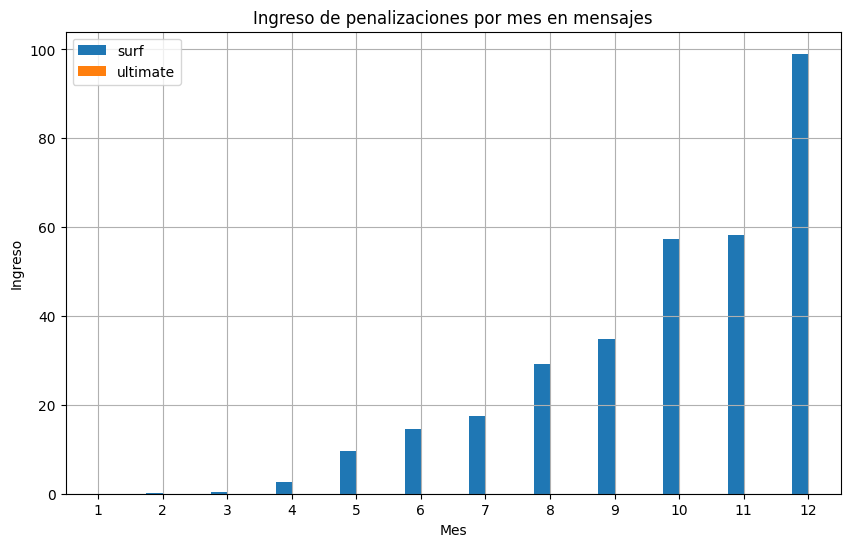

In [46]:
# Analizaremos las penalizaciones de mensajes al mes.

# Creamos e inicializamos la columna para guardar los ingresos por penalizaciones de mensajes.
plan_consum_user_month['income_pen_msn'] = 0

# Mensajes plan Surf -> 50 permitidos // $0.03 por mensaje
plan_consum_user_month['income_pen_msn'] = np.where(
    ((plan_consum_user_month['plan_name'] == 'surf') & (plan_consum_user_month['messagesxmonth']>50)), 
    plan_consum_user_month['income_pen_msn'] + (plan_consum_user_month['messagesxmonth']-50)*0.03,
    plan_consum_user_month['income_pen_msn'])

# Mensajes plan Ultimate -> 1000 permitidos // $0.01 por mensaje
plan_consum_user_month['income_pen_msn'] = np.where(
    ((plan_consum_user_month['plan_name'] == 'ultimate') & (plan_consum_user_month['messagesxmonth']>1000)), 
    plan_consum_user_month['income_pen_msn'] + (plan_consum_user_month['messagesxmonth']-1000)*0.01,
    plan_consum_user_month['income_pen_msn'])

# Extraemos el total de penalizaciones de mensajes, por plan y por cada mes.
surf_income_pen_msn = plan_consum_user_month[plan_consum_user_month['plan_name']=='surf'][['month', 'income_pen_msn']].groupby('month').sum().round(2)
ultimate_income_pen_msn = plan_consum_user_month[plan_consum_user_month['plan_name']=='ultimate'][['month', 'income_pen_msn']].groupby('month').sum().round(2)

# Fusionamos ambos DataFrames de cada plan con los mísmos índices que son los meses.
income_pen_msn = pd.concat([surf_income_pen_msn, ultimate_income_pen_msn], axis='columns')

# Las renombramos para identificarlas más fácil.
income_pen_msn.columns = ['surf', 'ultimate']

# El índice lo convertimos en entero para que sea más claro el gráfico.
income_pen_msn.index = income_pen_msn.index.astype(int)

# Graficamos los datos.
income_pen_msn.plot(kind='bar',
                 title = 'Ingreso de penalizaciones por mes en mensajes', 
                 xlabel = 'Mes', 
                 ylabel = 'Ingreso', 
                 rot=360, 
                 figsize=(10, 6))
plt.grid()
plt.show()

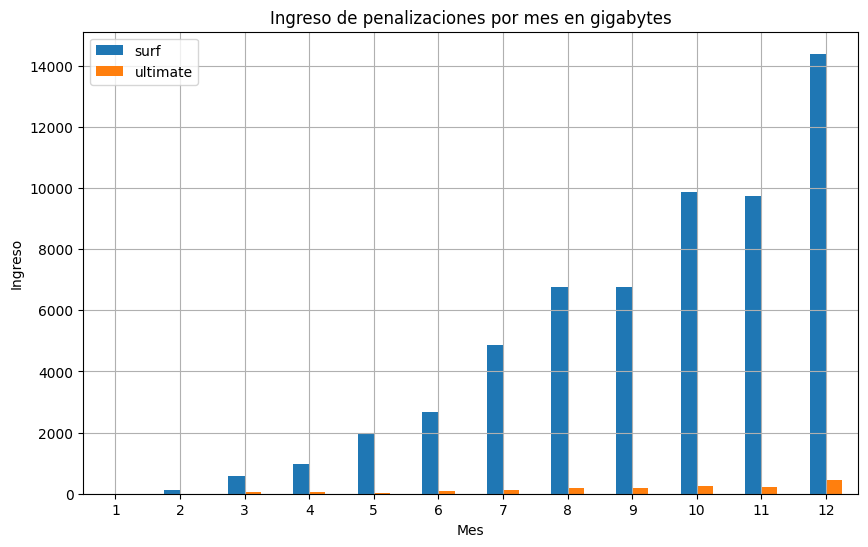

In [47]:
# Analizaremos las penalizaciones de internet al mes.

# Extraemos el total de gigabytes consumidos por usuario, por plan y por cada mes.
surf_income_pen_gb = plan_consum_user_month[plan_consum_user_month['plan_name']=='surf'][['user_id', 'month', 'gbxmonth']].groupby(['user_id', 'month']).sum().round(2).reset_index()
ultimate_income_pen_gb = plan_consum_user_month[plan_consum_user_month['plan_name']=='ultimate'][['user_id', 'month', 'gbxmonth']].groupby(['user_id', 'month']).sum().round(2).reset_index()

# Creamos e inicializamos la columna para guardar los ingresos por penalizaciones de internet.
surf_income_pen_gb['income_pen_gb'] = 0
ultimate_income_pen_gb['income_pen_gb'] = 0

# Ahora, agregaremos las penalizaciones a cada usuario para consumo de internet
# Internet plan Surf -> 15 permitidos // $10 por GigaByte
surf_income_pen_gb['income_pen_gb'] = np.where(
    surf_income_pen_gb['gbxmonth']>15, 
    surf_income_pen_gb['income_pen_gb'] + (surf_income_pen_gb['gbxmonth']-15)*10,
    surf_income_pen_gb['income_pen_gb'])

# Internet plan Ultimate -> 30 permitidos // $7 por GigaByte
ultimate_income_pen_gb['income_pen_gb'] = np.where(
    ultimate_income_pen_gb['gbxmonth']>30, 
    ultimate_income_pen_gb['income_pen_gb'] + (ultimate_income_pen_gb['gbxmonth']-30)*7,
    ultimate_income_pen_gb['income_pen_gb'])

# Fusionamos ambos DataFrames de cada plan con los mísmos índices que son los meses.
income_pen_gb = pd.concat([surf_income_pen_gb[['month', 'income_pen_gb']].groupby('month').sum(), 
                          ultimate_income_pen_gb[['month', 'income_pen_gb']].groupby('month').sum()], 
                          axis='columns')

# Las renombramos para identificarlas más fácil.
income_pen_gb.columns = ['surf', 'ultimate']

# El índice lo convertimos en entero para que sea más claro el gráfico.
income_pen_gb.index = income_pen_gb.index.astype(int)

# Graficamos los datos.
income_pen_gb.plot(kind='bar',
                 title = 'Ingreso de penalizaciones por mes en gigabytes', 
                 xlabel = 'Mes', 
                 ylabel = 'Ingreso', 
                 rot=360, 
                 figsize=(10, 6))
plt.grid()
plt.show()


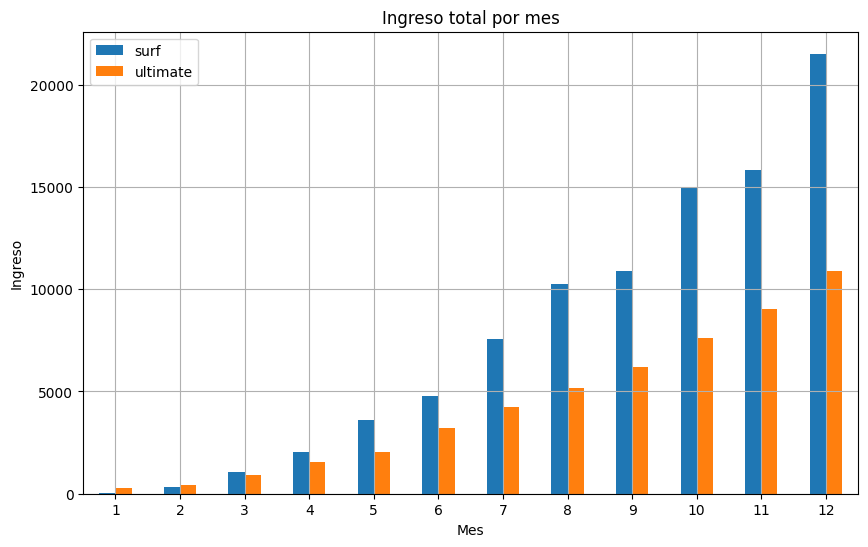

In [48]:
# Analizaremos el ingreso total al mes.

# Extraemos el total de ingresos (penalizaciones y planes), por plan, servicios y por cada mes.
surf_total_income = income_pen_gb['surf'] + income_pen_msn['surf'] + income_call_pen['surf'] + plan_income['surf']
ultimate_total_income = income_pen_gb['ultimate'] + income_pen_msn['ultimate'] + income_call_pen['ultimate'] + plan_income['ultimate']

# Fusionamos ambos DataFrames de cada plan con los mísmos índices que son los meses.
total_income = pd.concat([surf_total_income, 
                          ultimate_total_income], 
                          axis='columns')


# Las renombramos para identificarlas más fácil.
total_income.columns = ['surf', 'ultimate']

# El índice lo convertimos en entero para que sea más claro el gráfico.
total_income.index = total_income.index.astype(int)

# Graficamos los datos.
total_income.plot(kind='bar',
                 title = 'Ingreso total por mes', 
                 xlabel = 'Mes', 
                 ylabel = 'Ingreso', 
                 rot=360, 
                 figsize=(10, 6))
plt.grid()
plt.show()

surf        92833.92
ultimate    51534.00
dtype: float64


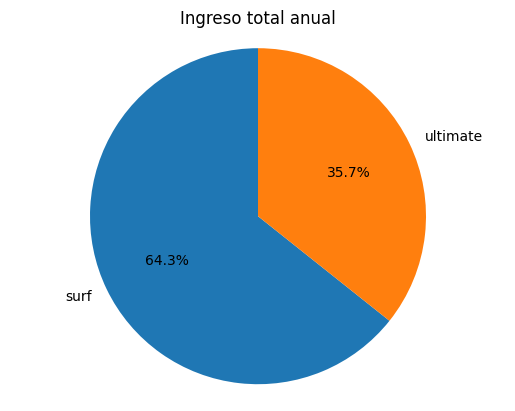

<Figure size 1000x600 with 0 Axes>

In [49]:
# Se mostraran los ingresos totales al año.

print(total_income.sum())

# Graficando los datos
plt.pie(total_income.sum(), labels=['surf', 'ultimate'], autopct='%1.1f%%', startangle=90)

# Establecer que el gráfico sea un círculo
plt.axis('equal')

# Establecer título y tamaño de la gráfica
plt.title('Ingreso total anual')
plt.figure(figsize=(10, 6))
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

**Respuesta:** Como se había analizado en la sección 1.13, al ver el ingreso que generan los planes por sí solos (sin las penalizaciones de los servicios) es claro que el plan *Ultimate*, por ser más caro, generaría mayor rentabilidad. Sin embargo, al evaluar cada servicio por separado podemos apreciar que el plan *Surf* paga penalizaciones en todos los servicios; siendo los mensajes el servicio con menor entrada de ingresos por penalizaciones, mientras que el servicio de llamadas genera un ingreso con una diferencia significativa en comparación con los mensajes, pero el servicio que genera mucho más ingreso es el de internet, produciendo más del doble de ingresos que el plan pór sí solo. Esto representa un punto fundamental para poder **confirmar y concluir** que en 10 de 12 meses **hay mayor rentabilidad en el plan *Surf*** generando más de \$20,000.00 en el mejor mes. Y anualmente, el ingreso del plan *Surf* es \$92,833.92 y representa el 64.3\% de los ingresos, mientras que el plan *Ultimate* generó \$51534.00 que representa el 35.7\%.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

**Hipotesis nula:** Los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf son iguales.

**Hipotesis alternativa:** Los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf no son iguales.

Usaremos la prueba `scipy.stats.ttest_ind(array1, array2, equal_var)` para la igualdad de las medias de dos poblaciones.

El valor alfa que usaremos será el  0.05.

In [50]:
# Prueba las hipótesis

# Juntando los ingresos del plan SURF tomando en cuenta el costo del plan, llamadas, mensajes e internet

# PLAN
income_plan_hip_surf = plan_consum_user_month[plan_consum_user_month['plan_name']=='surf'][['month', 'usd_monthly_pay']]

#llamads
income_call_hip_surf = plan_consum_user_month[plan_consum_user_month['plan_name']=='surf'][['month', 'income_pen_call']]

#msn
income_msn_hip_surf = plan_consum_user_month[plan_consum_user_month['plan_name']=='surf'][['month', 'income_pen_msn']]

#gb
income_gb_hip_surf = surf_income_pen_gb[['month', 'income_pen_gb']]

#Fusionamos
income_hip_surf = pd.concat([income_plan_hip_surf['usd_monthly_pay'], 
                             income_call_hip_surf['income_pen_call'], 
                             income_msn_hip_surf['income_pen_msn'], 
                             income_gb_hip_surf['income_pen_gb']], 
                            ignore_index=True)

#Juntando los ingresos del plan ULTIMATE tomando en cuenta el costo del plan, llamadas, mensajes e internet

# PLAN
income_plan_hip_ultimate = plan_consum_user_month[plan_consum_user_month['plan_name']=='ultimate'][['month', 'usd_monthly_pay']]

#LLAMADAS
income_call_hip_ultimate = plan_consum_user_month[plan_consum_user_month['plan_name']=='ultimate'][['month', 'income_pen_call']]

#MSN
income_msn_hip_ultimate = plan_consum_user_month[plan_consum_user_month['plan_name']=='ultimate'][['month', 'income_pen_msn']]

#GB
income_gb_hip_ultimate = ultimate_income_pen_gb[['month', 'income_pen_gb']]

#Fusionamos
income_hip_ultimate = pd.concat([income_plan_hip_surf['usd_monthly_pay'], 
                                 income_call_hip_ultimate['income_pen_call'], 
                                 income_msn_hip_ultimate['income_pen_msn'], 
                                 income_gb_hip_ultimate['income_pen_gb']], 
                            ignore_index=True)

alpha = 0.05  # el nivel de significancia estadística crítica

# Prueba t-Student sobre la igualdad de las medias de dos poblaciones.
results = ttest_ind(income_hip_surf, income_hip_ultimate, equal_var=False)

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  8.206510298403586e-47
Rechazamos la hipótesis nula


In [51]:
# Realizaremos La prueba de Levene, para verificar que ambas varianzas son diferentes.

levene_test = levene(income_hip_surf, income_hip_ultimate)
print('el valor p:', levene_test.pvalue)

# Interpretar el resultado
if levene_test.pvalue < 0.05:
    print("Las varianzas no son iguales (rechazamos H₀).")
else:
    print("No se rechaza la hipótesis nula (las varianzas son iguales).")

el valor p: 1.5290329582380948e-32
Las varianzas no son iguales (rechazamos H₀).


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

**Hipotesis nula:** El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones.

**Hipotesis alternativa:** El ingreso promedio de los usuarios del área NY-NJ no es igual al de los usuarios de otras regiones.

Usaremos la prueba `scipy.stats.ttest_ind(array1, array2, equal_var)` para la igualdad de las medias de dos poblaciones.

El valor alfa que usaremos será el  0.05.

In [52]:
# Creamos y fusionamos los DataFrames que contengan la ciudad para realizar el filtrado.
# Este se ocupa para el plan, lamadas y mensajes.
plan_consum_user_month_NY = plan_consum_user_month.merge(users[['user_id', 'city']], on='user_id', how='left')
# Este se ocupa sólo para el internet.
income_gb_hip_NY = surf_income_pen_gb.merge(users[['user_id', 'city']], on='user_id', how='left')


In [53]:
# Prueba las hipótesis

# Juntando los ingresos de los usuarios de la ciudad NY-NJ y tomando en cuenta el costo del plan, llamadas, mensajes e internet
# PLAN
income_plan_hip_NY = plan_consum_user_month_NY[plan_consum_user_month_NY['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA'][['month', 'usd_monthly_pay']]

#llamads
income_call_hip_NY = plan_consum_user_month_NY[plan_consum_user_month_NY['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA'][['month', 'income_pen_call']]

#msn
income_msn_hip_NY = plan_consum_user_month_NY[plan_consum_user_month_NY['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA'][['month', 'income_pen_msn']]

#gb 
income_gb_hip_NYNJ = income_gb_hip_NY[income_gb_hip_NY['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA'][['month', 'income_pen_gb']]

#Fusionamos
income_hip_NY = pd.concat([income_plan_hip_NY['usd_monthly_pay'], 
                             income_call_hip_NY['income_pen_call'], 
                             income_msn_hip_NY['income_pen_msn'], 
                             income_gb_hip_NYNJ['income_pen_gb']], 
                            ignore_index=True)

# Juntando los ingresos de los usuarios QUE NO SON de la ciudad NY-NJ y tomando en cuenta el costo del plan, llamadas, mensajes e internet
# PLAN
income_plan_hip_NONY = plan_consum_user_month_NY[plan_consum_user_month_NY['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA'][['month', 'usd_monthly_pay']]

#llamads
income_call_hip_NONY = plan_consum_user_month_NY[plan_consum_user_month_NY['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA'][['month', 'income_pen_call']]

#msn
income_msn_hip_NONY = plan_consum_user_month_NY[plan_consum_user_month_NY['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA'][['month', 'income_pen_msn']]

#gb 
income_gb_hip_NONY = income_gb_hip_NY[income_gb_hip_NY['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA'][['month', 'income_pen_gb']]

#Fusionamos
income_hip_NONY = pd.concat([income_plan_hip_NONY['usd_monthly_pay'], 
                             income_call_hip_NONY['income_pen_call'], 
                             income_msn_hip_NONY['income_pen_msn'], 
                             income_gb_hip_NONY['income_pen_gb']], 
                            ignore_index=True)

alpha = 0.05  # el nivel de significancia estadística crítica

# Prueba t-Student sobre la igualdad de las medias de dos poblaciones.
results_NY = ttest_ind(income_hip_NY, income_hip_NONY, equal_var=False)

print('valor p: ', results_NY.pvalue) # extraer el valor p

if results_NY.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.003970252987305861
Rechazamos la hipótesis nula


In [54]:
# Realizaremos La prueba de Levene, para verificar que ambas varianzas son diferentes.

levene_NY= levene(income_hip_NY, income_hip_NONY)
print('el valor p:', levene_NY.pvalue)

# Interpretar el resultado
if levene_NY.pvalue < 0.05:
    print("Las varianzas no son iguales (rechazamos H₀).")
else:
    print("No se rechaza la hipótesis nula (las varianzas son iguales).")

el valor p: 0.008811273097810279
Las varianzas no son iguales (rechazamos H₀).


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

**Respuesta:** Desde que comencé a analizar los datos por plan, buscaba identificar cuál plan era el más rentable, sin embargo el pago de penalizaciones era algo que no me daba certeza a la hora de decir qué plan generaba más ingresos. 

Y una vez que junté los datos he ingresos de cada plan, servicio y més. Me di cuenta de una manera más clara qué plan es el que deja más ingresos. 

Finalmente, con la prueba de hipotesis confirmé lo que ya había deducido y así pude practicar y aprender a usar las pruebas de hipótesis para mustras estadisticas como la que se me proporcionó.
